# SPOTIFY RECOMMENDATION SYSTEM

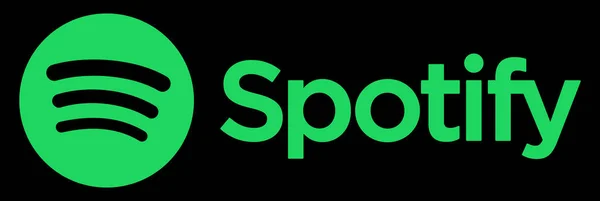

According to Spotify's official website, Spotify is a digital music service that gives you access to millions of songs. Spotify is an excellent example of recommendation system engines. We shall here, try to build one such recommendation engine using Spotify dataset based on user input and preference.

**Problem Statement and Approach:** 
We have a dataset of spotify tracks over a range of 114000 tracks and 125 different genres. We need to build a recommendation system that returns top recommended songs based on user input.

Each track has some audio features associated with it. We shall first understand the dataset, clean and preprocess it and perform data visualisation before fitting the data to a Machine Learning Algorithm.

After performing the above steps, we shall fit the data to a clustering Algorithm and create a function that returns recommended songs to users based on input songs.


***Source of the dataset: Kaggle***

We shall perform the below steps:
1. Loading and Understanding the dataset
2. Data Visualisation
3. Cleaning and preprocessing the dataset
4. Dimensionality reduction Using PCA
5. Fitting the data to an ML model
6. Analysing our Clustered Dataframe
7. Building a function that recommends songs based on the clusters
8. Conclusion

## Loading and Understanding the dataset

We shall first load the dataset and explore it.

In [421]:
#Importing libraries
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans


In [333]:
#Reading the dataset
df=pd.read_csv("spotify.csv")

#Displaying first five rows of the dataset
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

We do not require the first column. Hence we shall drop it to save memory.

In [334]:
#Dropping unwanted columns
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [335]:
#Displaying size of the dataset
df.shape

(114000, 20)

We have about 114000 entries and 20 features. Let us understand what each feature means.

In [336]:
#Displaying column names
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

Column Description:
1. track_id: The Spotify ID for the track
2. artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
3. album_name: The album name in which the track appears
4. track_name: Name of the track
5. popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
6. duration_ms: The track length in milliseconds
7. explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
8. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
9. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
10. key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
11. loudness: The overall loudness of a track in decibels (dB)
12. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
13. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
14. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
15. instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
16. liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
17. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
18. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
19. time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
20. track_genre: The genre in which the track belongs

In [337]:
#Displaying dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

The above information about the dataset shows that there are no null values in any column. Hence, we are good to go. Let us now understand some statistical distribution of each column.

In [338]:
#Displaying statitical measures of the dataset
df.describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

Let us now check the unique values of each feature.

In [339]:
df.nunique().sort_values()

mode                    2
explicit                2
time_signature          5
key                    12
popularity            101
track_genre           114
danceability         1174
speechiness          1489
liveness             1722
valence              1790
energy               2083
acousticness         5061
instrumentalness     5346
loudness            19480
artists             31437
tempo               45653
album_name          46589
duration_ms         50697
track_name          73608
track_id            89741
dtype: int64

As we can see, some features have really low unique values like 'Mode','Explicit' etc.

Also, even though there are about 89741 unique track ids, the number of unique track names is lesser than that. This can happen if there are songs with the same name but sung by different artists or different versions of the a song sung by the same artist or different covers of the same song.

Also, it is interesting to note that even though there are about 11400 different entries, there are only 89741 unique track ids. Let us understand the reason behind this.

In [340]:
df.loc[df['track_id'] == '5SuOikwiRyPMVoIQDJUgSV']

track_id      artists album_name track_name  popularity  \
0       5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy          73   
62102   5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy          73   
99152   5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy          73   
102151  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy          73   

        duration_ms  explicit  danceability  energy  key  loudness  mode  \
0            230666     False         0.676   0.461    1    -6.746     0   
62102        230666     False         0.676   0.461    1    -6.746     0   
99152        230666     False         0.676   0.461    1    -6.746     0   
102151       230666     False         0.676   0.461    1    -6.746     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0             0.143        0.0322          0.000001     0.358    0.715   
62102         0.143        0.0322          0.000001     0.358    0.715   
99152         0.143        0.0322          0.000001     0.358    0.715   
102151        0.143        0.0322          0.000001     0.358    0.715   

         tempo  time_signature        track_genre  
0       87.917               4           acoustic  
62102   87.917               4              j-pop  
99152   87.917               4  singer-songwriter  
102151  87.917               4         songwriter

As we can see, for the same track id, we have 4 different entries. In these entries, all features are same except the track genre. Clearly one song can be categorised into different genres. Hence, the multiple entries for one track id.

In [341]:
df.describe(include="O")

track_id      artists                  album_name  \
count                   114000       113999                      113999   
unique                   89741        31437                       46589   
top     6S3JlDAGk3uu3NtZbPnuhS  The Beatles  Alternative Christmas 2022   
freq                         9          279                         195   

             track_name track_genre  
count            113999      114000  
unique            73608         114  
top     Run Rudolph Run   reggaeton  
freq                151        1000

In [342]:
df['artists'].value_counts()

The Beatles                                         279
George Jones                                        271
Stevie Wonder                                       236
Linkin Park                                         224
Ella Fitzgerald                                     222
                                                   ... 
Los Auténticos Decadentes;"Sax" Maldita Vecindad      1
Cavaleiros do Forró;Mara Pavanelly                    1
Stanton Warriors;Cause;Affect                         1
Billx;Shanti People                                   1
Sujatha;Vidya Viswambaran                             1
Name: artists, Length: 31437, dtype: int64

According to above data, The Beatles is the top artist and 'Run Rudolph Run' is the top track. This does not necessarily imply that 'The Beatles' is the most listened to artist or 'Run Rudolph Run' is the most listened to track. As we can see above, one possible reason behind this could be that 'The Beatles' has 279 entries which tops the list of artists in the number of times it occurs. 

Popularity of a perticular track is what is of major interest here. If we can link popularity of tracks to its various other features, then we can understand the dataset better.

Let us look at some most popular tracks.

In [343]:
df_popular=df.sort_values(by=['popularity'],ascending=False)
df_popular.head(10)

track_id                  artists  \
20001  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
81051  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
51664  2tTmW7RDtMQtBk7m2rYeSw         Bizarrap;Quevedo   
81210  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
89411  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
68303  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
88410  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
30003  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
20008  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
67356  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   

                                  album_name  \
20001              Unholy (feat. Kim Petras)   
81051              Unholy (feat. Kim Petras)   
51664  Quevedo: Bzrp Music Sessions, Vol. 52   
81210                        I'm Good (Blue)   
89411                             La Bachata   
68303                             La Bachata   
88410                             La Bachata   
30003                        I'm Good (Blue)   
20008                        I'm Good (Blue)   
67356                             La Bachata   

                                  track_name  popularity  duration_ms  \
20001              Unholy (feat. Kim Petras)         100       156943   
81051              Unholy (feat. Kim Petras)         100       156943   
51664  Quevedo: Bzrp Music Sessions, Vol. 52          99       198937   
81210                        I'm Good (Blue)          98       175238   
89411                             La Bachata          98       162637   
68303                             La Bachata          98       162637   
88410                             La Bachata          98       162637   
30003                        I'm Good (Blue)          98       175238   
20008                        I'm Good (Blue)          98       175238   
67356                             La Bachata          98       162637   

       explicit  danceability  energy  key  loudness  mode  speechiness  \
20001     False         0.714   0.472    2    -7.375     1       0.0864   
81051     False         0.714   0.472    2    -7.375     1       0.0864   
51664     False         0.621   0.782    2    -5.548     1       0.0440   
81210      True         0.561   0.965    7    -3.673     0       0.0343   
89411     False         0.835   0.679    7    -5.329     0       0.0364   
68303     False         0.835   0.679    7    -5.329     0       0.0364   
88410     False         0.835   0.679    7    -5.329     0       0.0364   
30003      True         0.561   0.965    7    -3.673     0       0.0343   
20008      True         0.561   0.965    7    -3.673     0       0.0343   
67356     False         0.835   0.679    7    -5.329     0       0.0364   

       acousticness  instrumentalness  liveness  valence    tempo  \
20001       0.01300          0.000005     0.266    0.238  131.121   
81051       0.01300          0.000005     0.266    0.238  131.121   
51664       0.01250          0.033000     0.230    0.550  128.033   
81210       0.00383          0.000007     0.371    0.304  128.040   
89411       0.58300          0.000002     0.218    0.850  124.980   
68303       0.58300          0.000002     0.218    0.850  124.980   
88410       0.58300          0.000002     0.218    0.850  124.980   
30003       0.00383          0.000007     0.371    0.304  128.040   
20008       0.00383          0.000007     0.371    0.304  128.040   
67356       0.58300          0.000002     0.218    0.850  124.980   

       time_signature track_genre  
20001               4       dance  
81051               4         pop  
51664               4     hip-hop  
81210               4         pop  
89411               4   reggaeton  
68303               4      latino  
88410               4      reggae  
30003               4         edm  
20008               4       dance  
67356               4       latin

As we can see, 'Unholy (feat. Kim Petras)' is the top track sung by 'Sam Smith;Kim Petras'. Let us now perform some data visualisation to understand our dataset better.

## Data Visualisation

Let us first plot histogram of all features to understand the distribution of data.

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

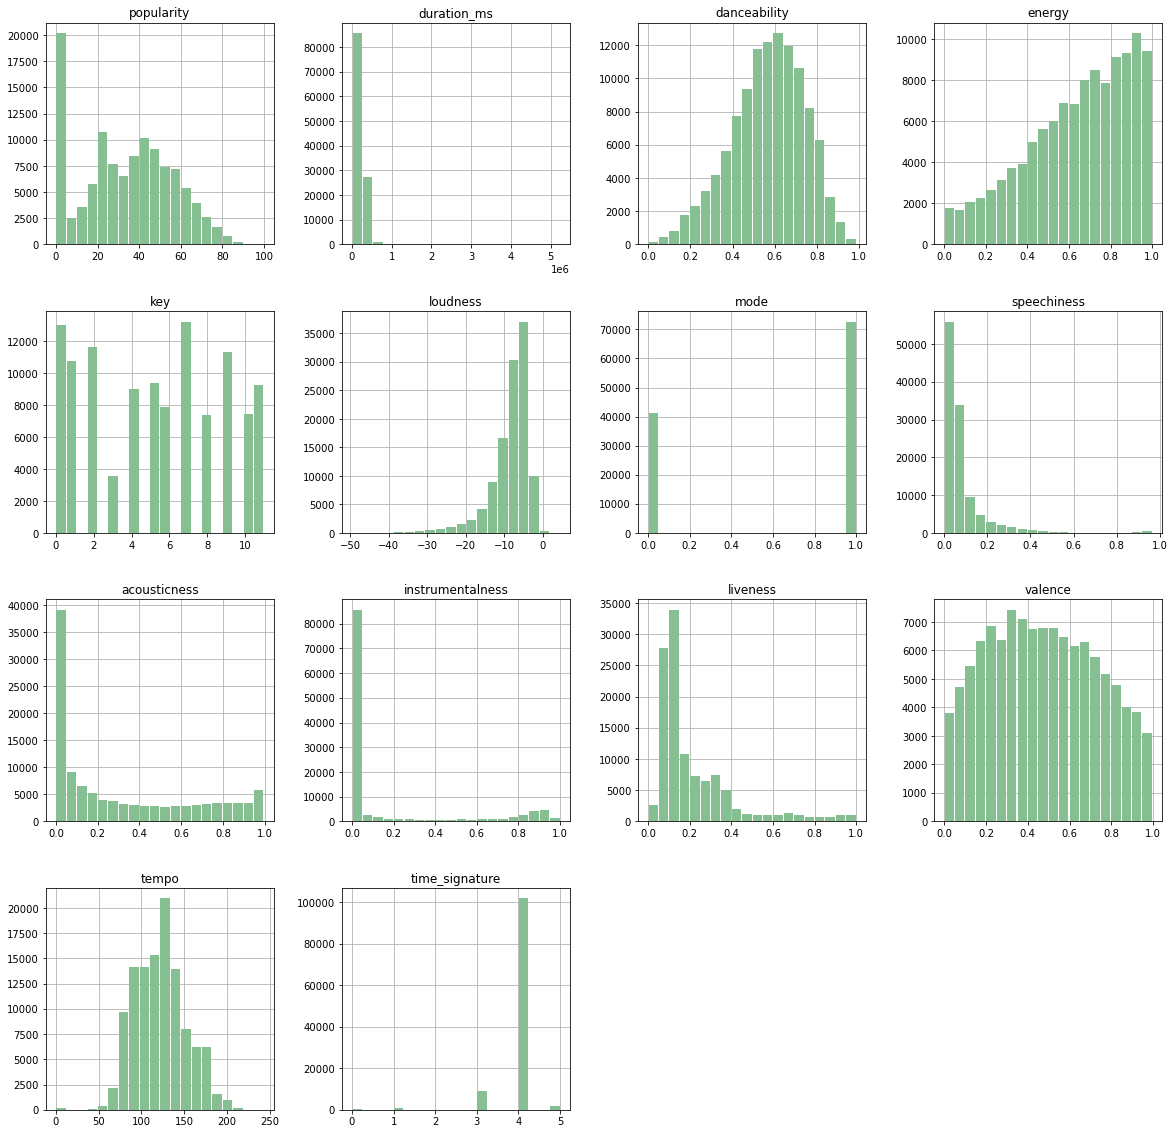

In [344]:
df_popular.hist(bins=20,figsize=(20,20),color='#86bf91', zorder=2, rwidth=0.9)

We see that certain features have outliers. We shall deal with them in the cleaning and preprocessing part.

As stated earlier, we are most interested in knowing the relationship of popularity with other features. We shall first understand how popularity is related with other variables. For this, we need the correlation matrix.

In [345]:
df_popular.corr()

popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.007101  0.044082      0.035448  0.001056   
duration_ms        -0.007101     1.000000 -0.065263     -0.073426  0.058523   
explicit            0.044082    -0.065263  1.000000      0.122507  0.096955   
danceability        0.035448    -0.073426  0.122507      1.000000  0.134325   
energy              0.001056     0.058523  0.096955      0.134325  1.000000   
key                -0.003853     0.008114  0.004484      0.036469  0.048006   
loudness            0.050423    -0.003470  0.108588      0.259077  0.761690   
mode               -0.013931    -0.035556 -0.037212     -0.069219 -0.078362   
speechiness        -0.044927    -0.062600  0.307952      0.108626  0.142509   
acousticness       -0.025472    -0.103788 -0.094403     -0.171533 -0.733906   
instrumentalness   -0.095139     0.124371 -0.103404     -0.185606 -0.181879   
liveness           -0.005387     0.010321  0.032549     -0.131617  0.184796   
valence            -0.040534    -0.154479 -0.003381      0.477341  0.258934   
tempo               0.013205     0.024346 -0.002816     -0.050450  0.247851   
time_signature      0.031073     0.018225  0.038386      0.207218  0.187126   

                       key  loudness      mode  speechiness  acousticness  \
popularity       -0.003853  0.050423 -0.013931    -0.044927     -0.025472   
duration_ms       0.008114 -0.003470 -0.035556    -0.062600     -0.103788   
explicit          0.004484  0.108588 -0.037212     0.307952     -0.094403   
danceability      0.036469  0.259077 -0.069219     0.108626     -0.171533   
energy            0.048006  0.761690 -0.078362     0.142509     -0.733906   
key               1.000000  0.038590 -0.135916     0.020418     -0.040937   
loudness          0.038590  1.000000 -0.041764     0.060826     -0.589803   
mode             -0.135916 -0.041764  1.000000    -0.046532      0.095553   
speechiness       0.020418  0.060826 -0.046532     1.000000     -0.002186   
acousticness     -0.040937 -0.589803  0.095553    -0.002186      1.000000   
instrumentalness -0.006823 -0.433477 -0.049955    -0.089616      0.104027   
liveness         -0.001600  0.076899  0.014012     0.205219     -0.020700   
valence           0.034103  0.279848  0.021953     0.036635     -0.107070   
tempo             0.010917  0.212446  0.000566     0.017273     -0.208224   
time_signature    0.015065  0.191992 -0.024092    -0.000011     -0.176138   

                  instrumentalness  liveness   valence     tempo  \
popularity               -0.095139 -0.005387 -0.040534  0.013205   
duration_ms               0.124371  0.010321 -0.154479  0.024346   
explicit                 -0.103404  0.032549 -0.003381 -0.002816   
danceability             -0.185606 -0.131617  0.477341 -0.050450   
energy                   -0.181879  0.184796  0.258934  0.247851   
key                      -0.006823 -0.001600  0.034103  0.010917   
loudness                 -0.433477  0.076899  0.279848  0.212446   
mode                     -0.049955  0.014012  0.021953  0.000566   
speechiness              -0.089616  0.205219  0.036635  0.017273   
acousticness              0.104027 -0.020700 -0.107070 -0.208224   
instrumentalness          1.000000 -0.079893 -0.324312 -0.050330   
liveness                 -0.079893  1.000000  0.019086  0.000600   
valence                  -0.324312  0.019086  1.000000  0.078273   
tempo                    -0.050330  0.000600  0.078273  1.000000   
time_signature           -0.082580 -0.023651  0.133686  0.066641   

                  time_signature  
popularity              0.031073  
duration_ms             0.018225  
explicit                0.038386  
danceability            0.207218  
energy                  0.187126  
key                     0.015065  
loudness                0.191992  
mode                   -0.024092  
speechiness            -0.000011  
acousticness           -0.176138  
instrumentalness       -0.082580  
liveness   

Let us now plot a heatmap to understand the correlation between various features in a better manner.

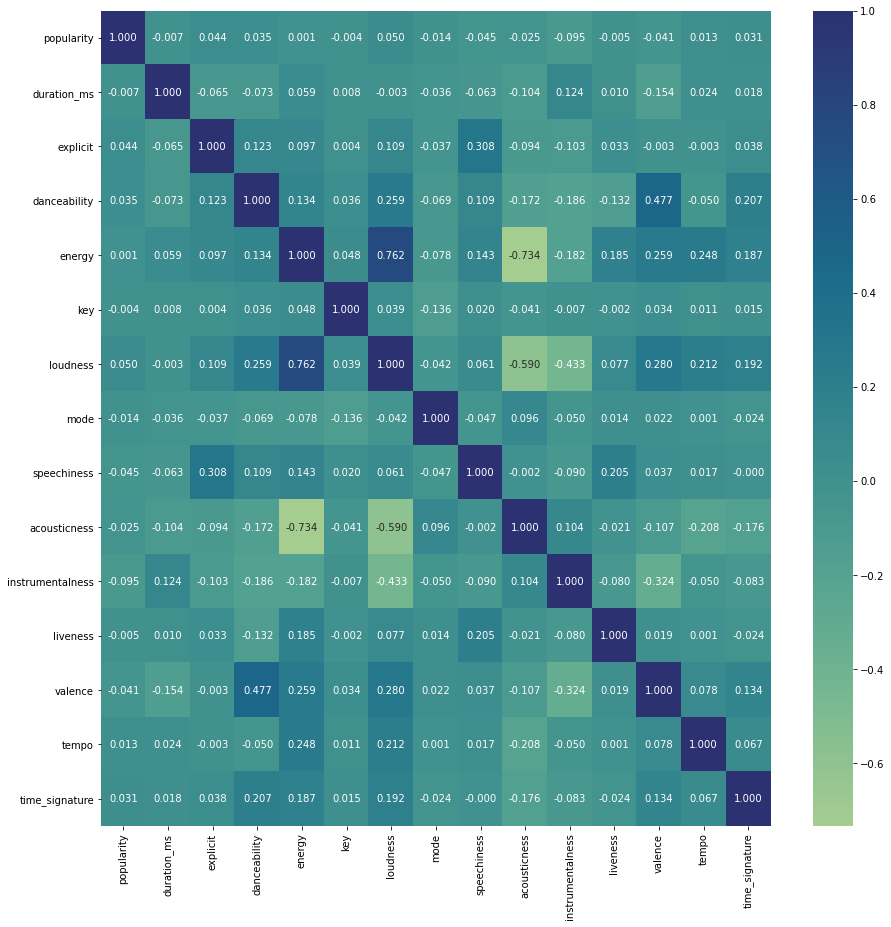

In [346]:
plt.figure(figsize = (15,15))
dataplot=sb.heatmap(df_popular.corr(),annot=True,cmap="crest",fmt=".3f")

**Observations:**

1. We observe that popularity has a negative correlation with ***duration_ms***. This tells us that more the duration, less the popularity.
2. We also observe a significant negative correlation between ***instrumentalness*** and ***popularity***. 
3. ***Danceability and Loudness*** show a decent positive correlation with Popularity.
4. ***Acousticness, Speechiness and Valence*** show a decent negative correlation with Popularity.

Let us now observe these features in depth and understand their correlation with Popularity.

#### Duration_ms vs Popularity

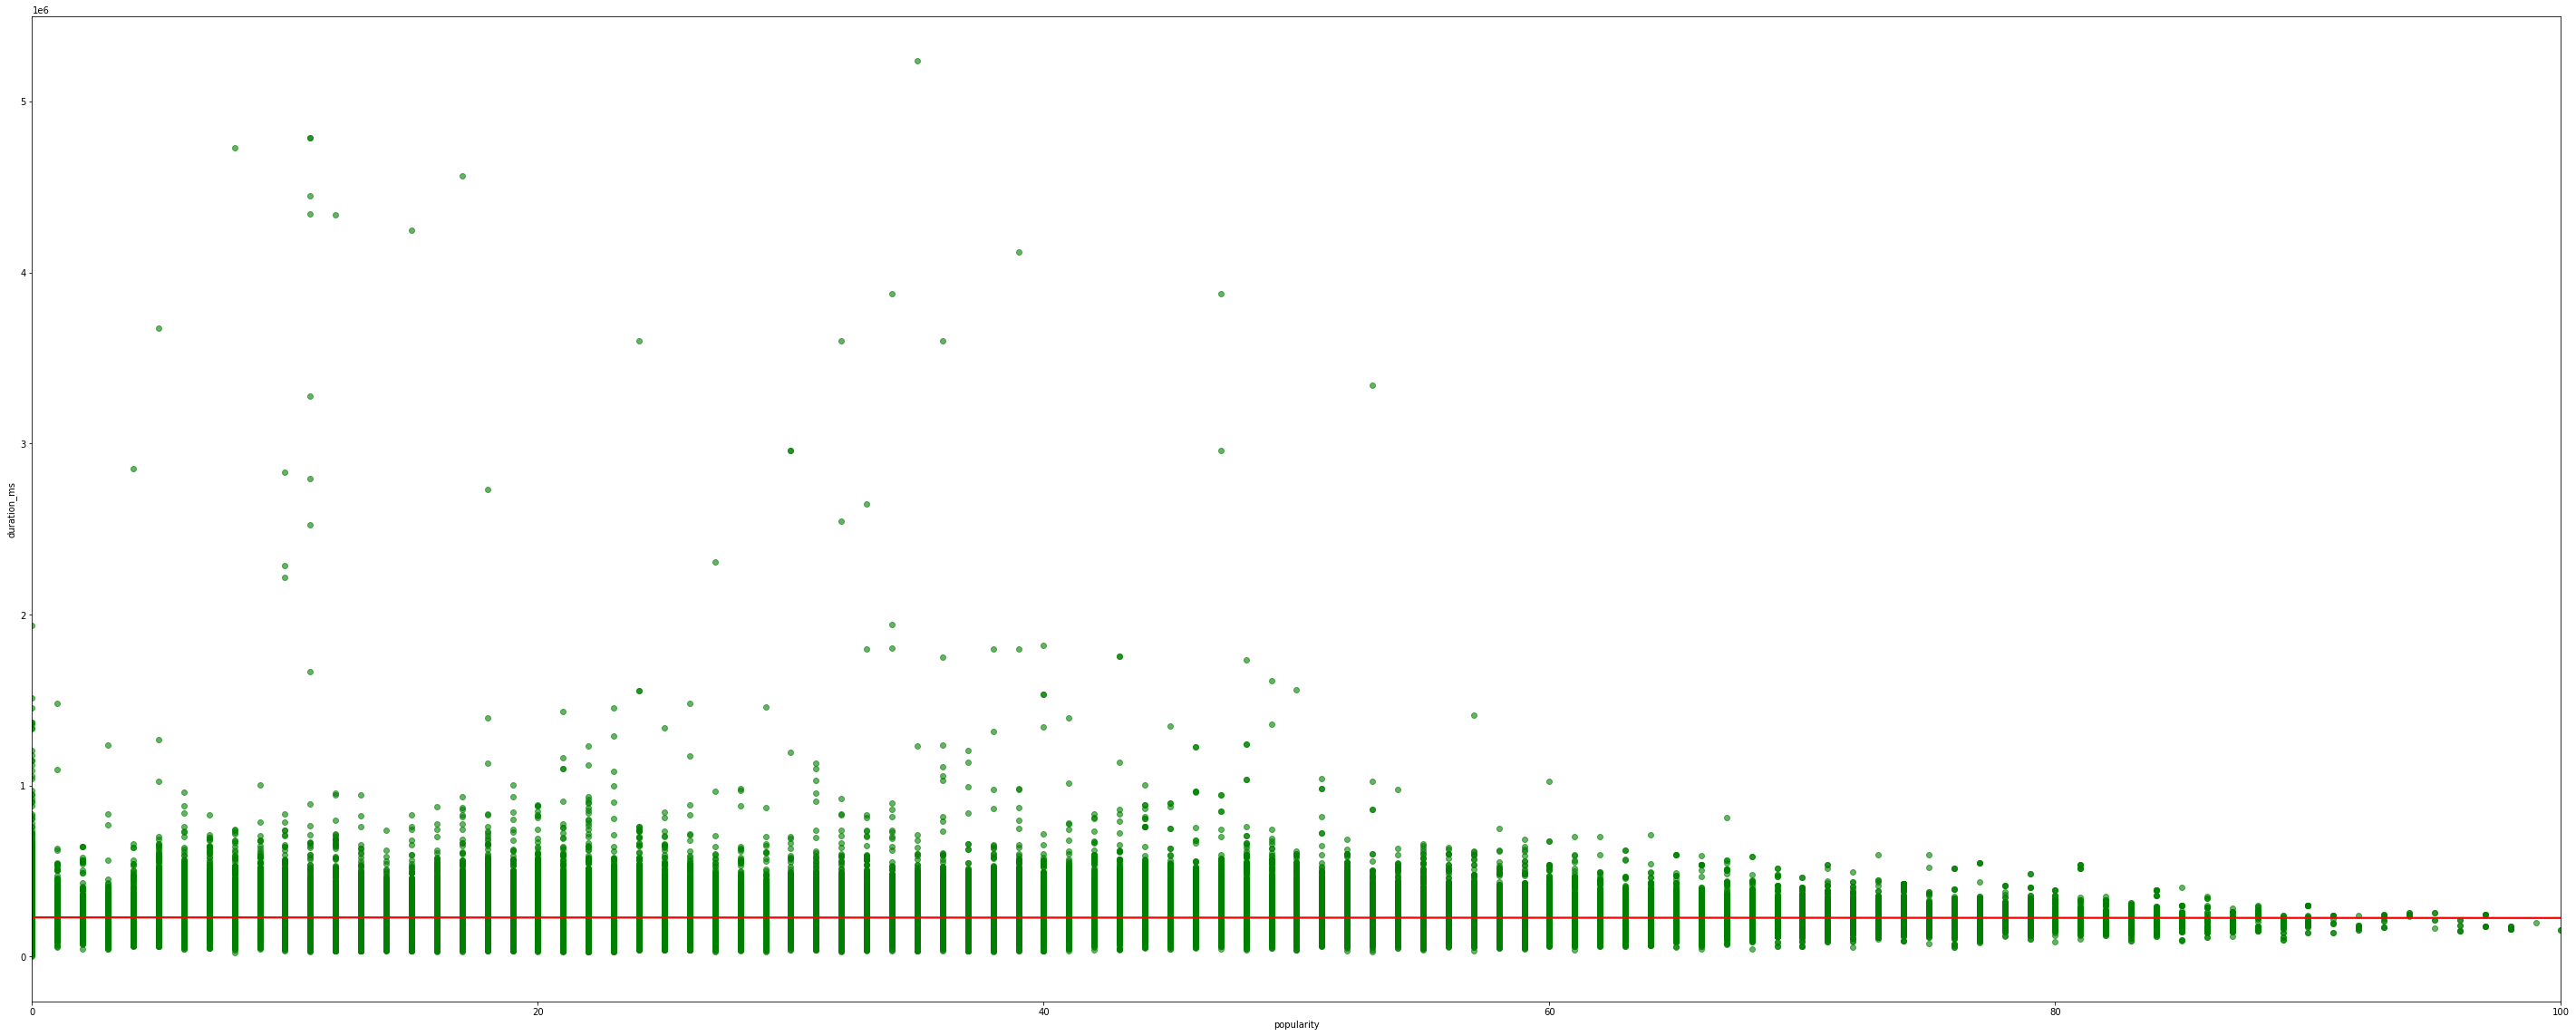

In [347]:
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular['popularity'], y=df_popular['duration_ms'],scatter_kws = {"color": "g","alpha":0.6},line_kws = {"color": "red"})
plt.show()

The above scatter plot shows that songs with high duration are least popular and the songs that are most popular have low suration. let us pick top 500 popular songs to understand the trend o regression line better.

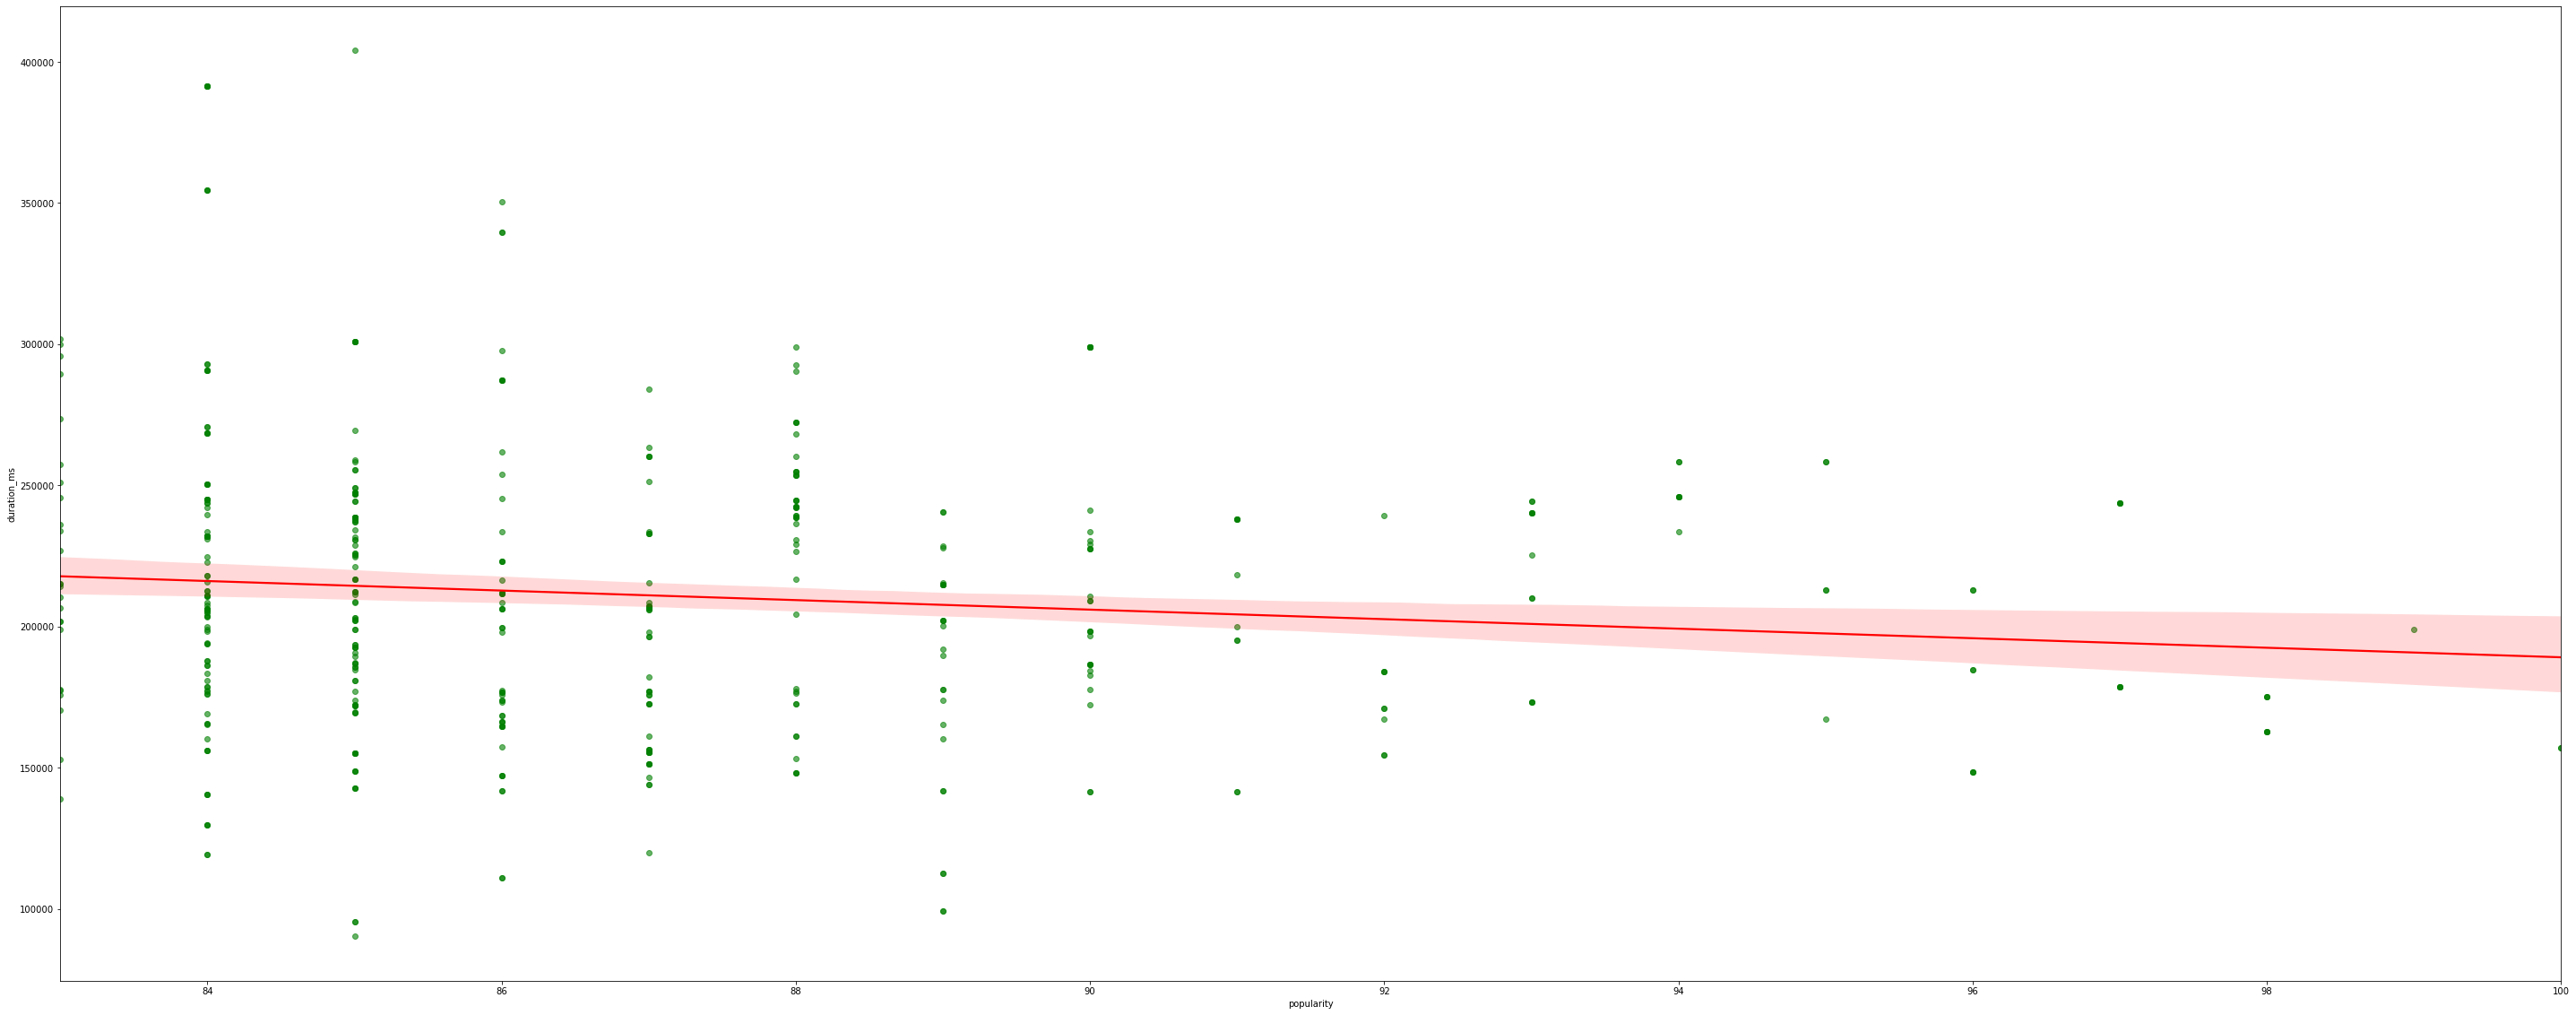

In [348]:
df_popular_500 = df_popular.iloc[:500]
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular_500['popularity'], y=df_popular_500['duration_ms'],scatter_kws = {"color": "g","alpha":0.6},line_kws = {"color": "red"})
plt.show()

This regression plot gives us a clear description between duration of songs and popularity. Thus we can say that ***songs with high duration are less likeley to be popular***. However it would be very absurd to state that songs with low duration are more likely to be popular because we can see plenty of songs that have very low duration yet are not popular.

#### Instrumentalness vs Popularity

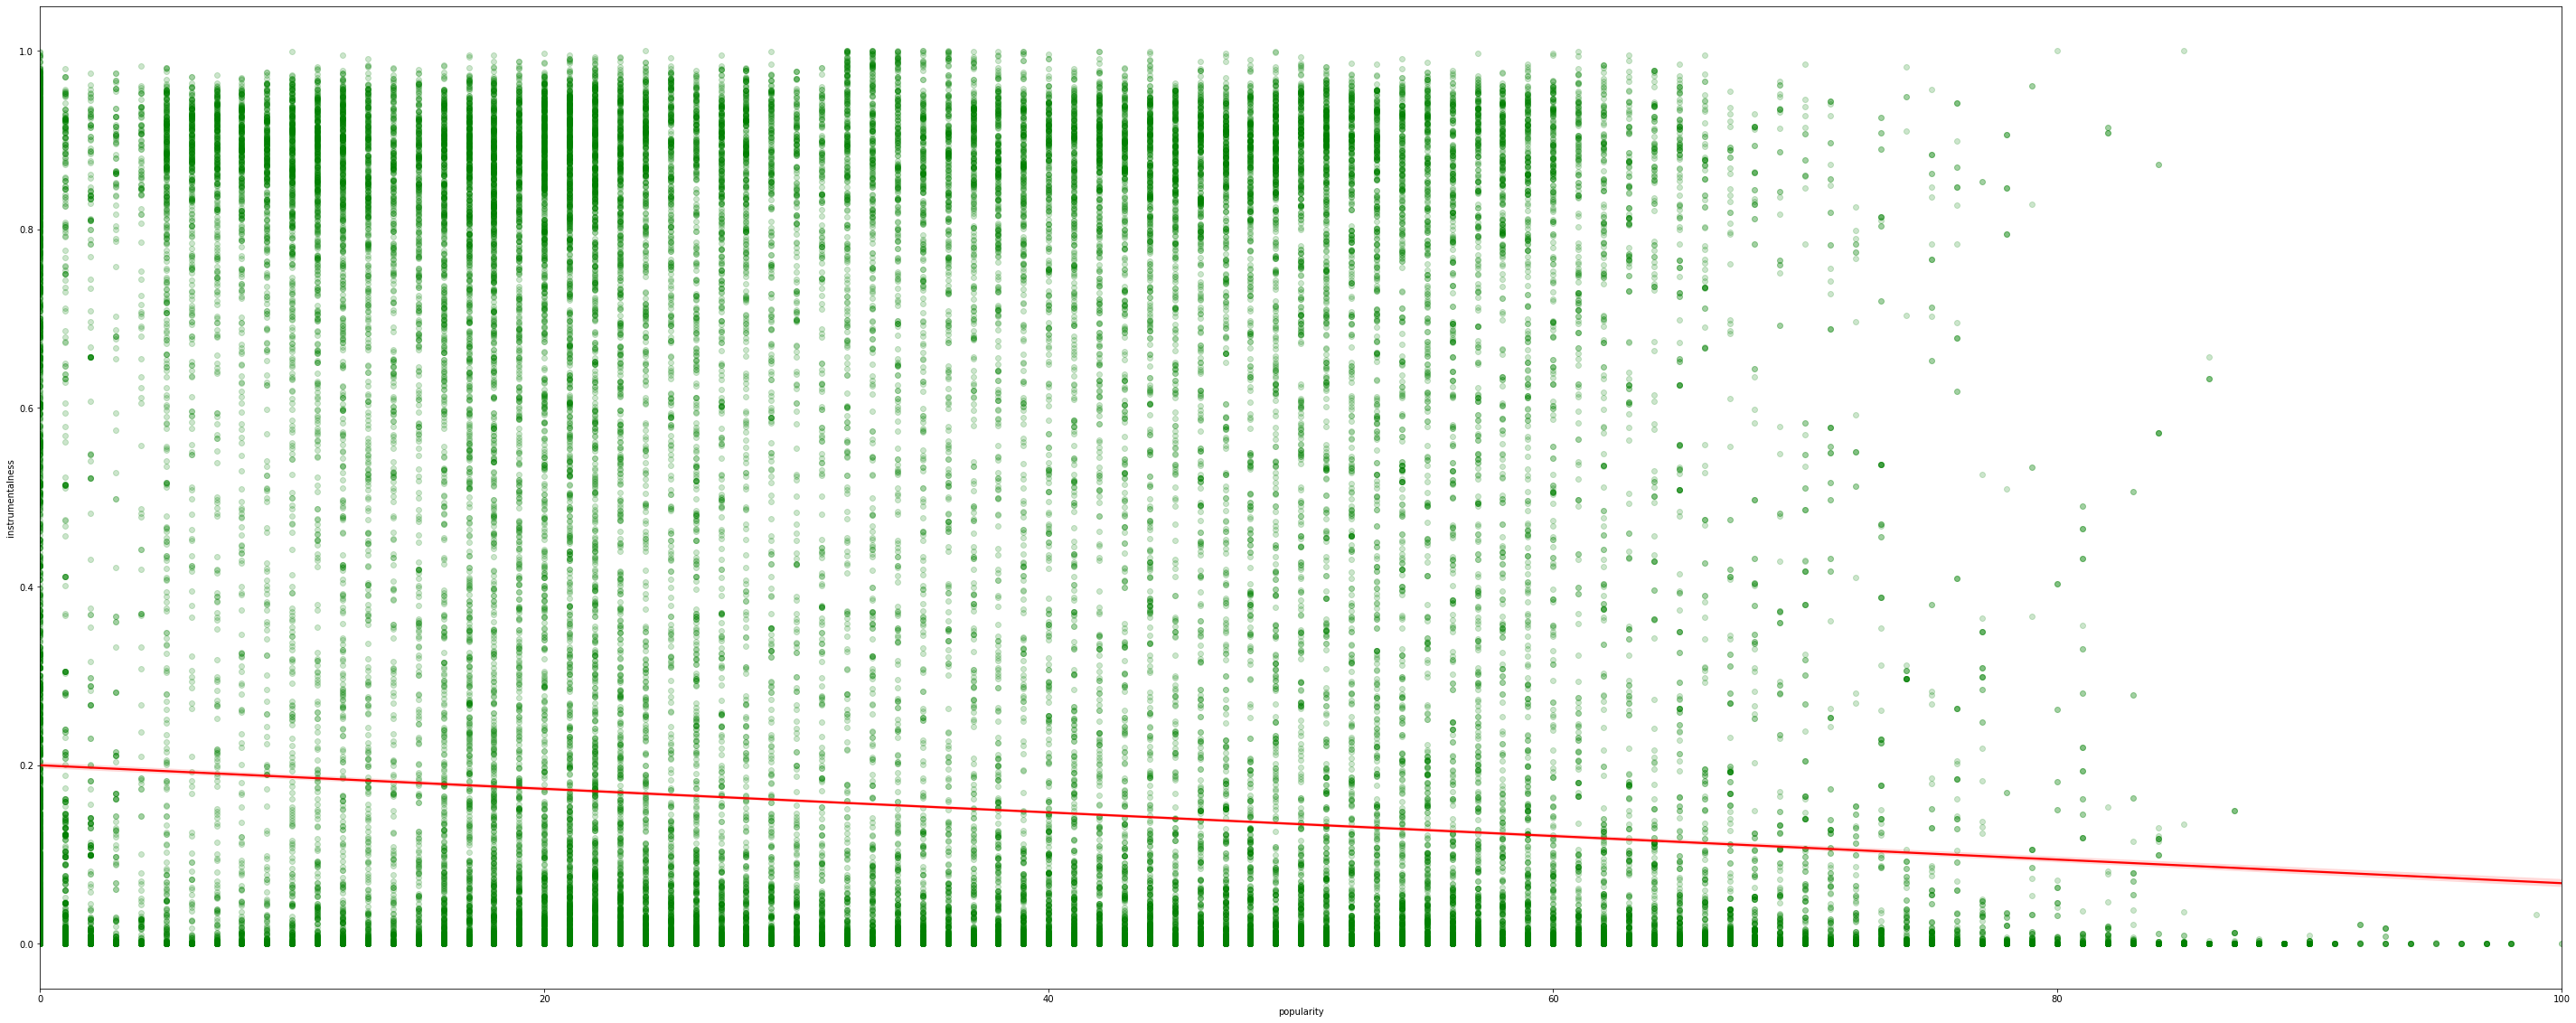

In [349]:
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular['popularity'], y=df_popular['instrumentalness'],scatter_kws = {"color": "g","alpha":0.2},line_kws = {"color": "red"})
plt.show()

The above regression plot gives us pretty clear results. We can say that ***songs with high instrumentalness are less popular and most popular songs have the lowest instrumentalness***. But again, we cannot surely state that if a song has low instrumentalness then it is bound to be popular.

#### Danceability vs Popularity

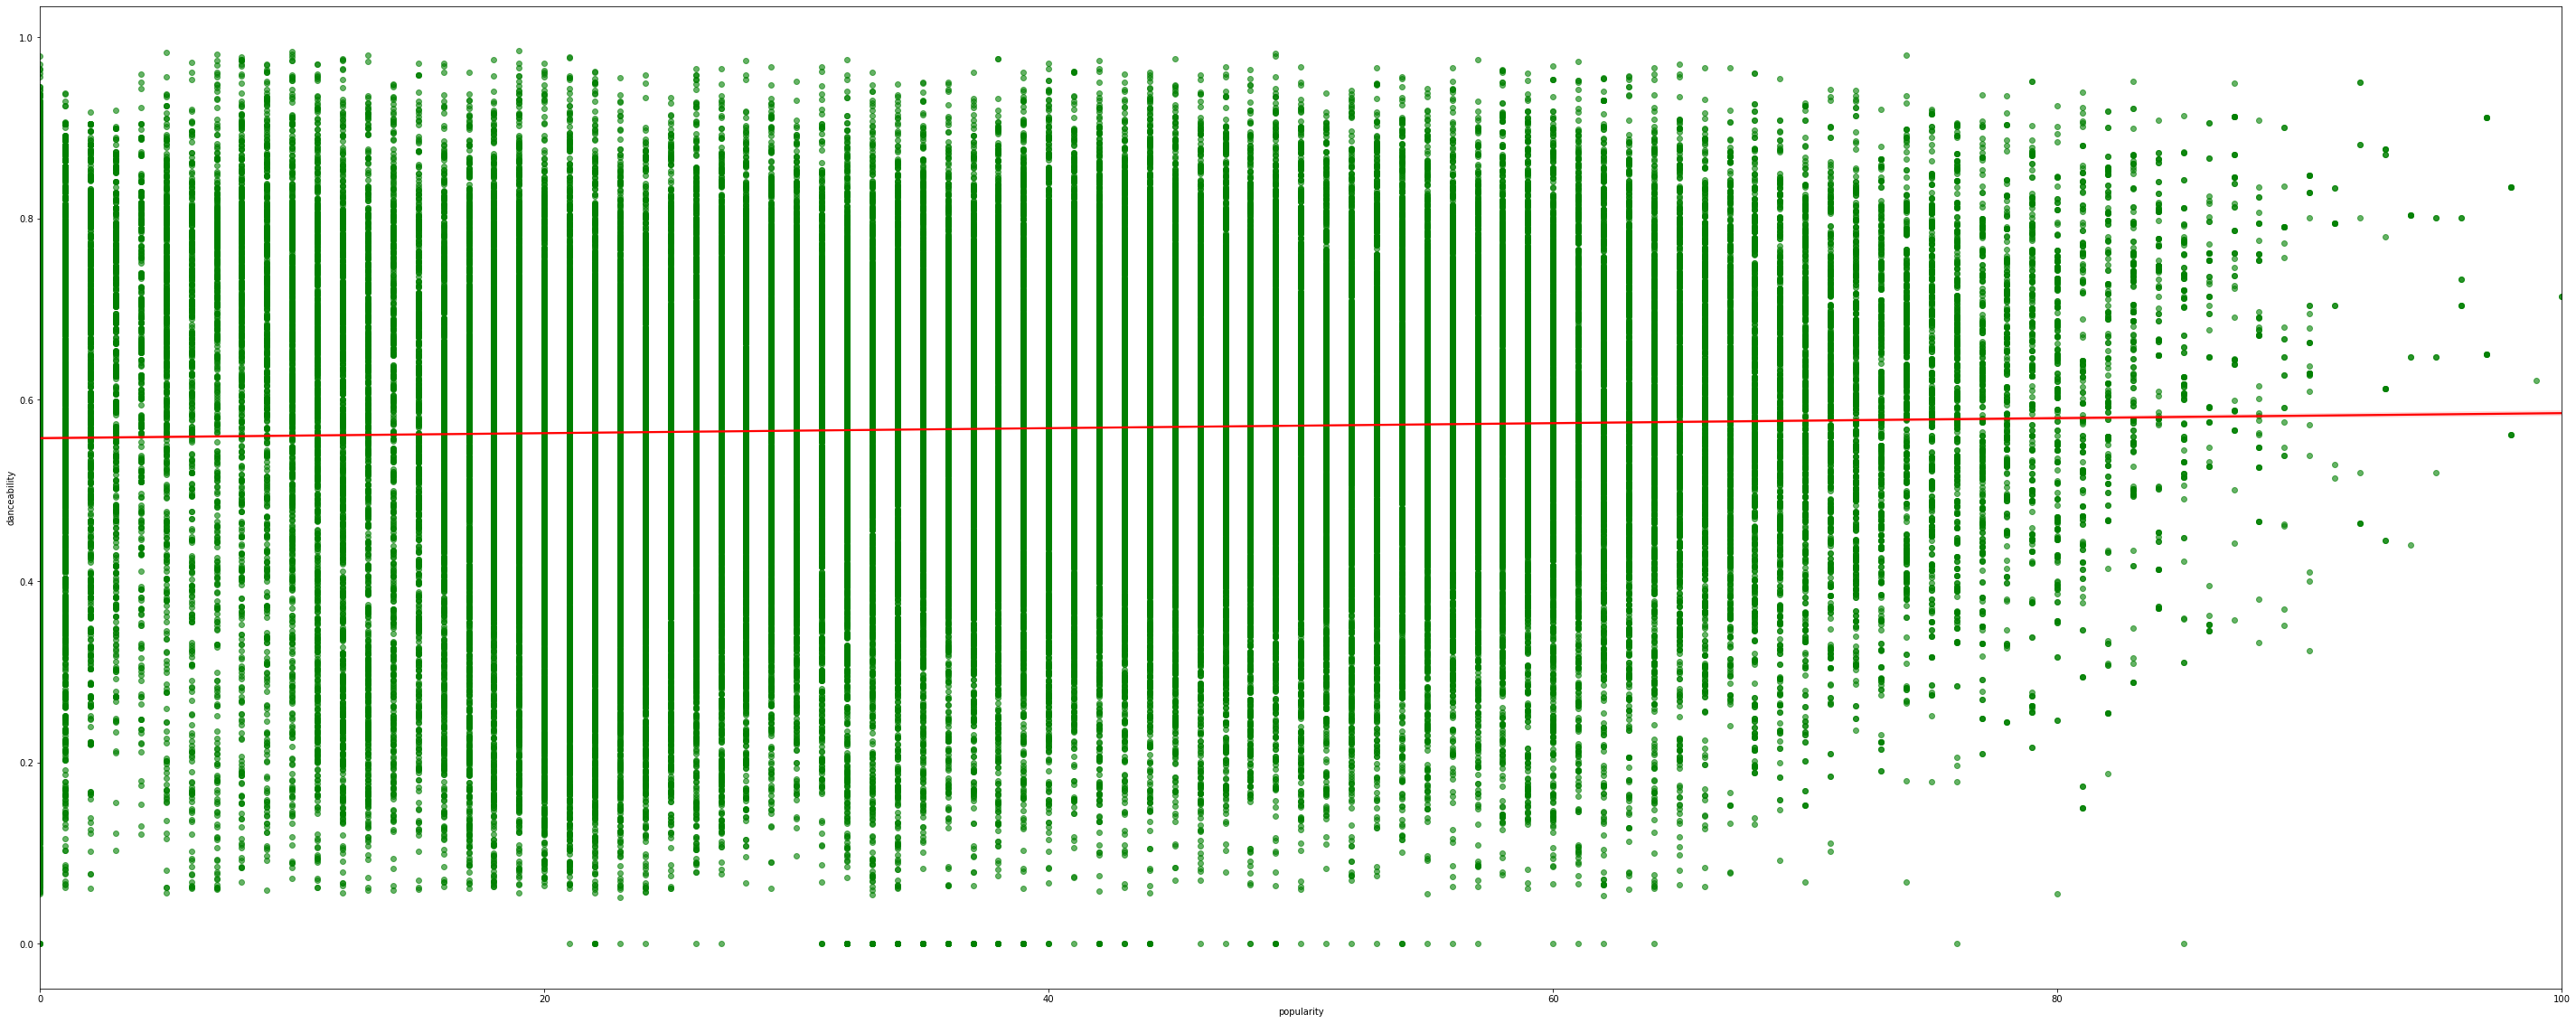

In [350]:
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular['popularity'], y=df_popular['danceability'],scatter_kws = {"color": "g","alpha":0.6},line_kws = {"color": "red"})
plt.show()

As we did with duration_ms, let us pick top 500 songs and plot the regression plot again.

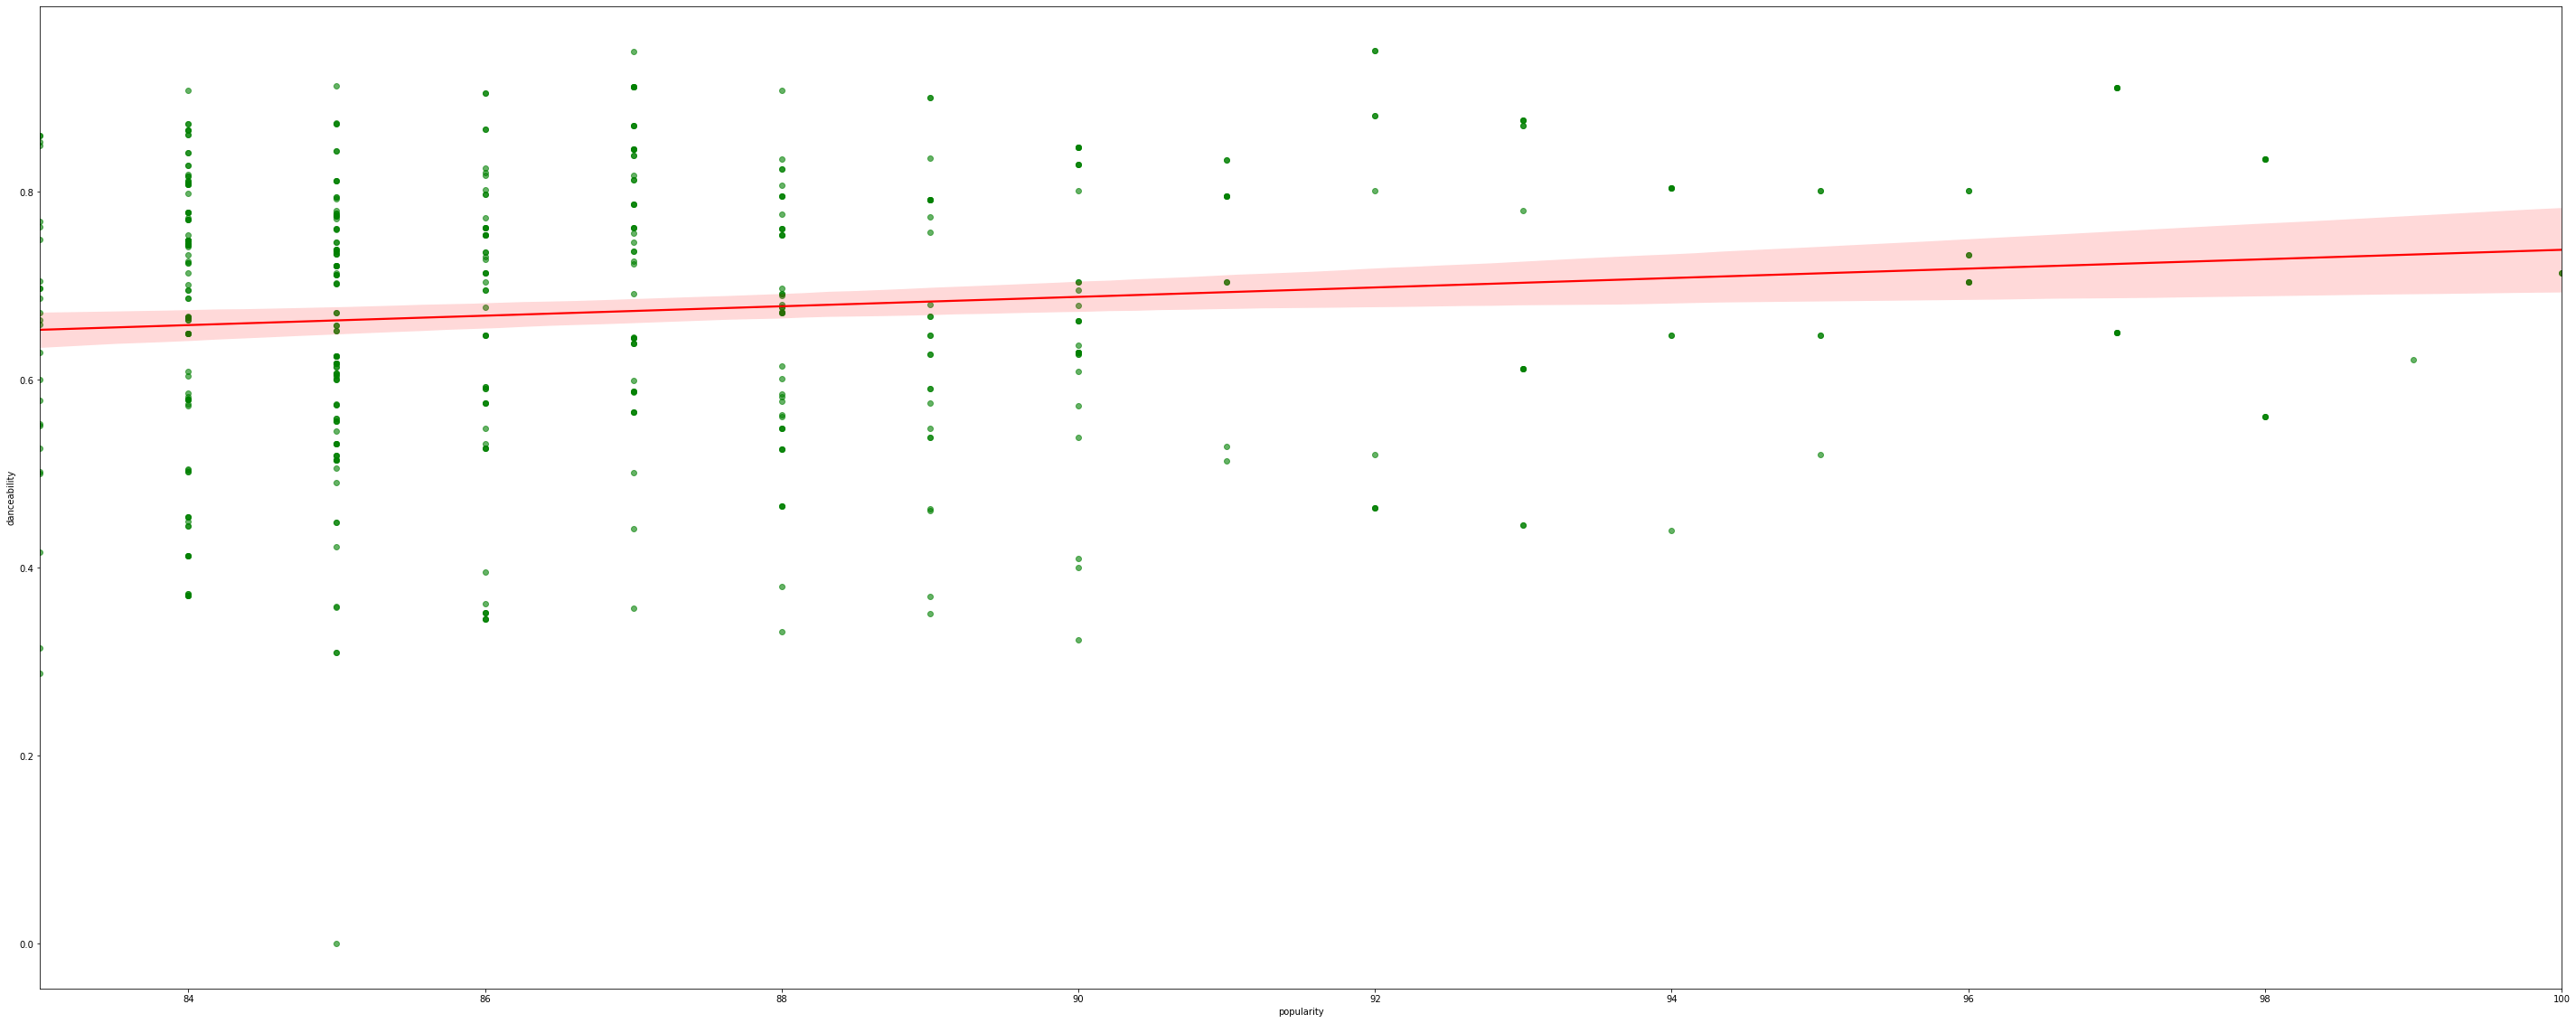

In [351]:
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular_500['popularity'], y=df_popular_500['danceability'],scatter_kws = {"color": "g","alpha":0.6},line_kws = {"color": "red"})
plt.show()

We see that the regression line slants slightly upwards. This shows that ***most popular songs have high danceability and songs with low danceability are less likely to be popular***.

#### Loudness vs Popularity

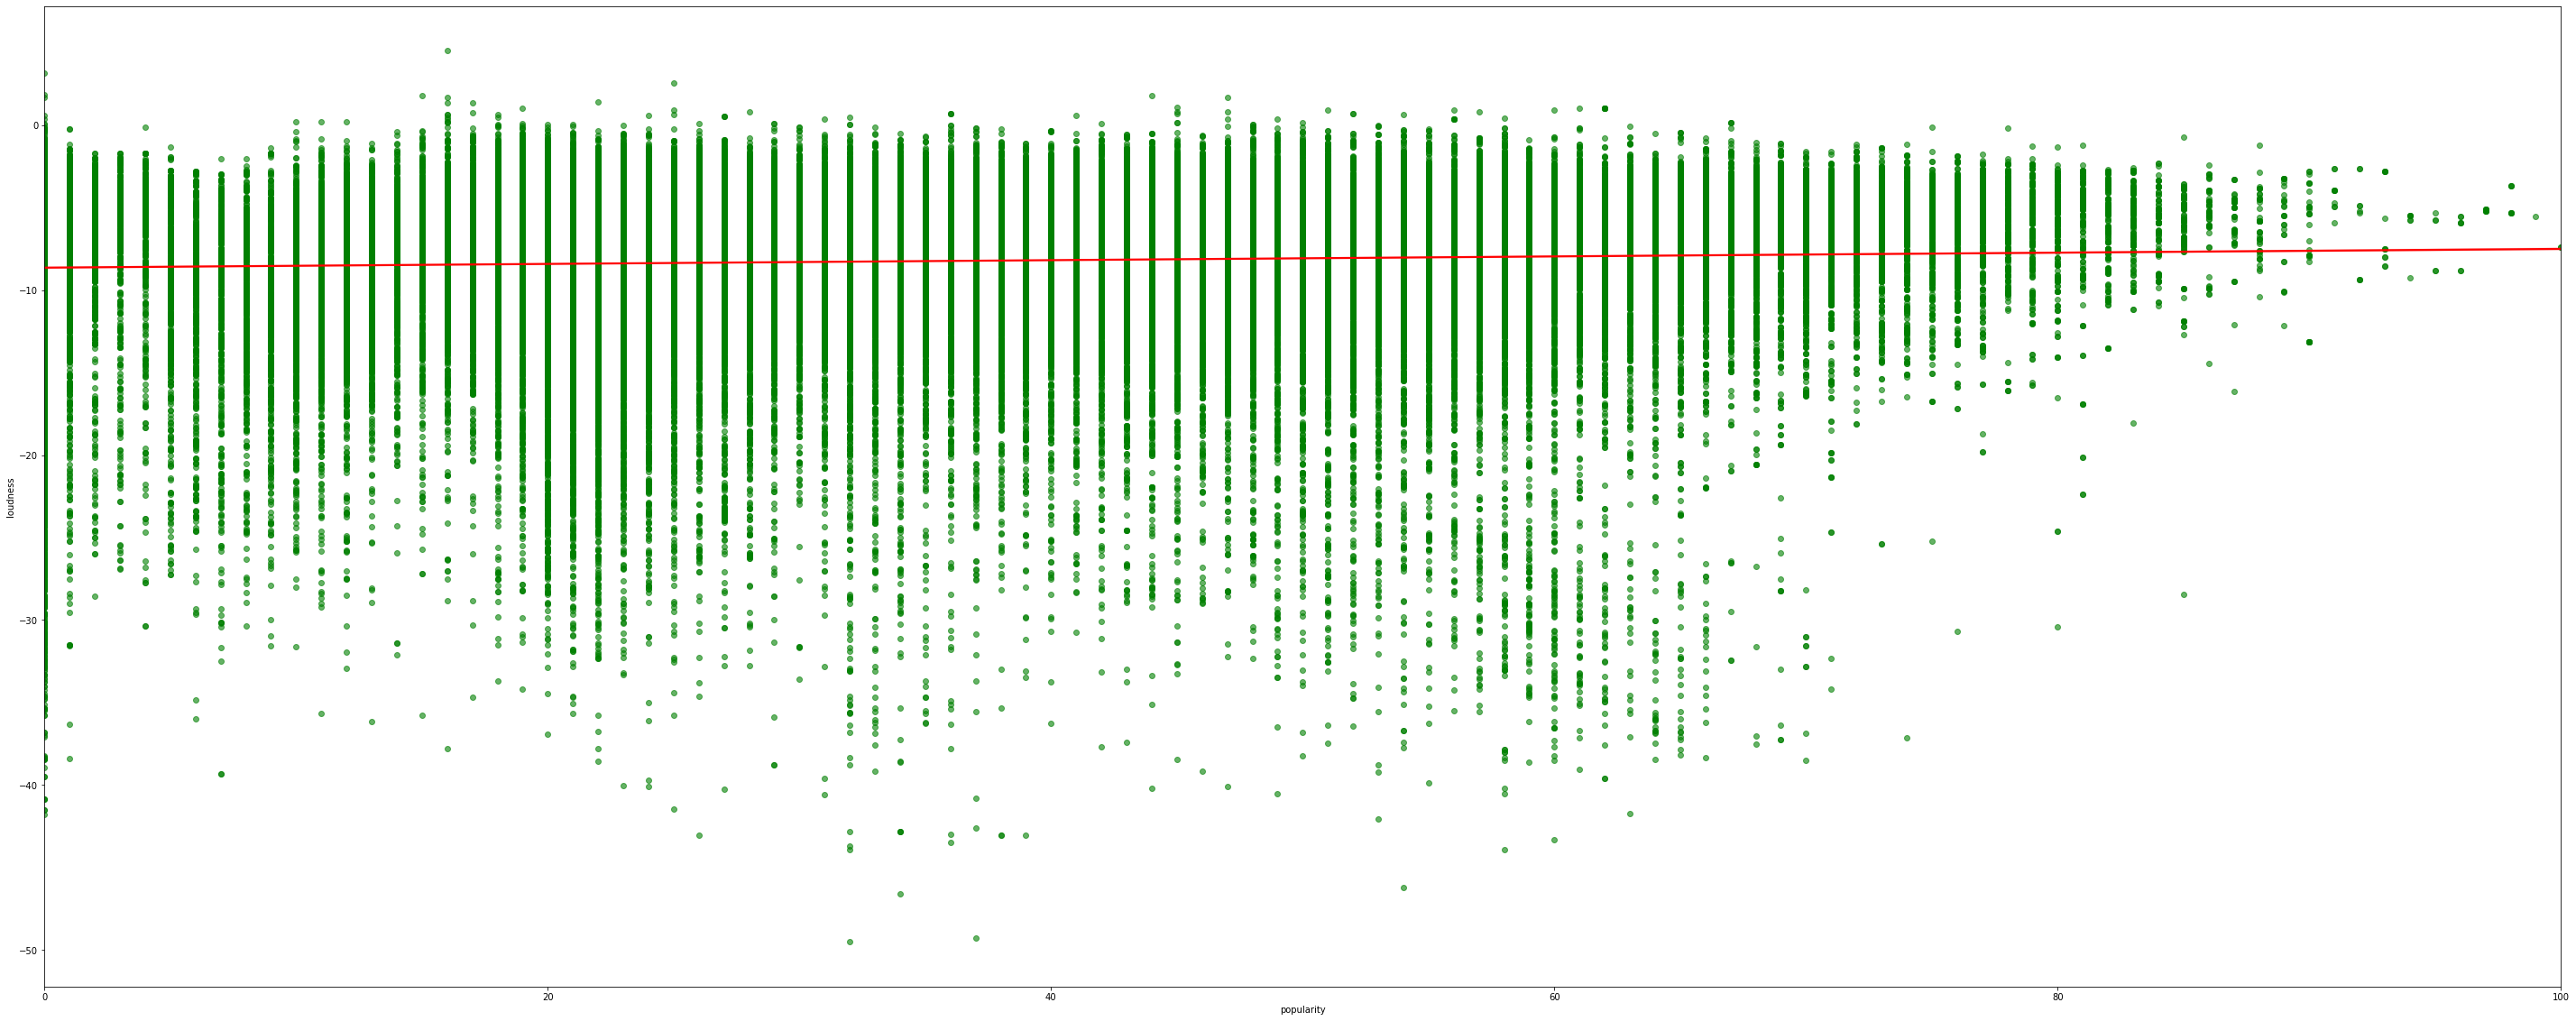

In [352]:
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular['popularity'], y=df_popular['loudness'],scatter_kws = {"color": "g","alpha":0.6},line_kws = {"color": "red"})
plt.show()

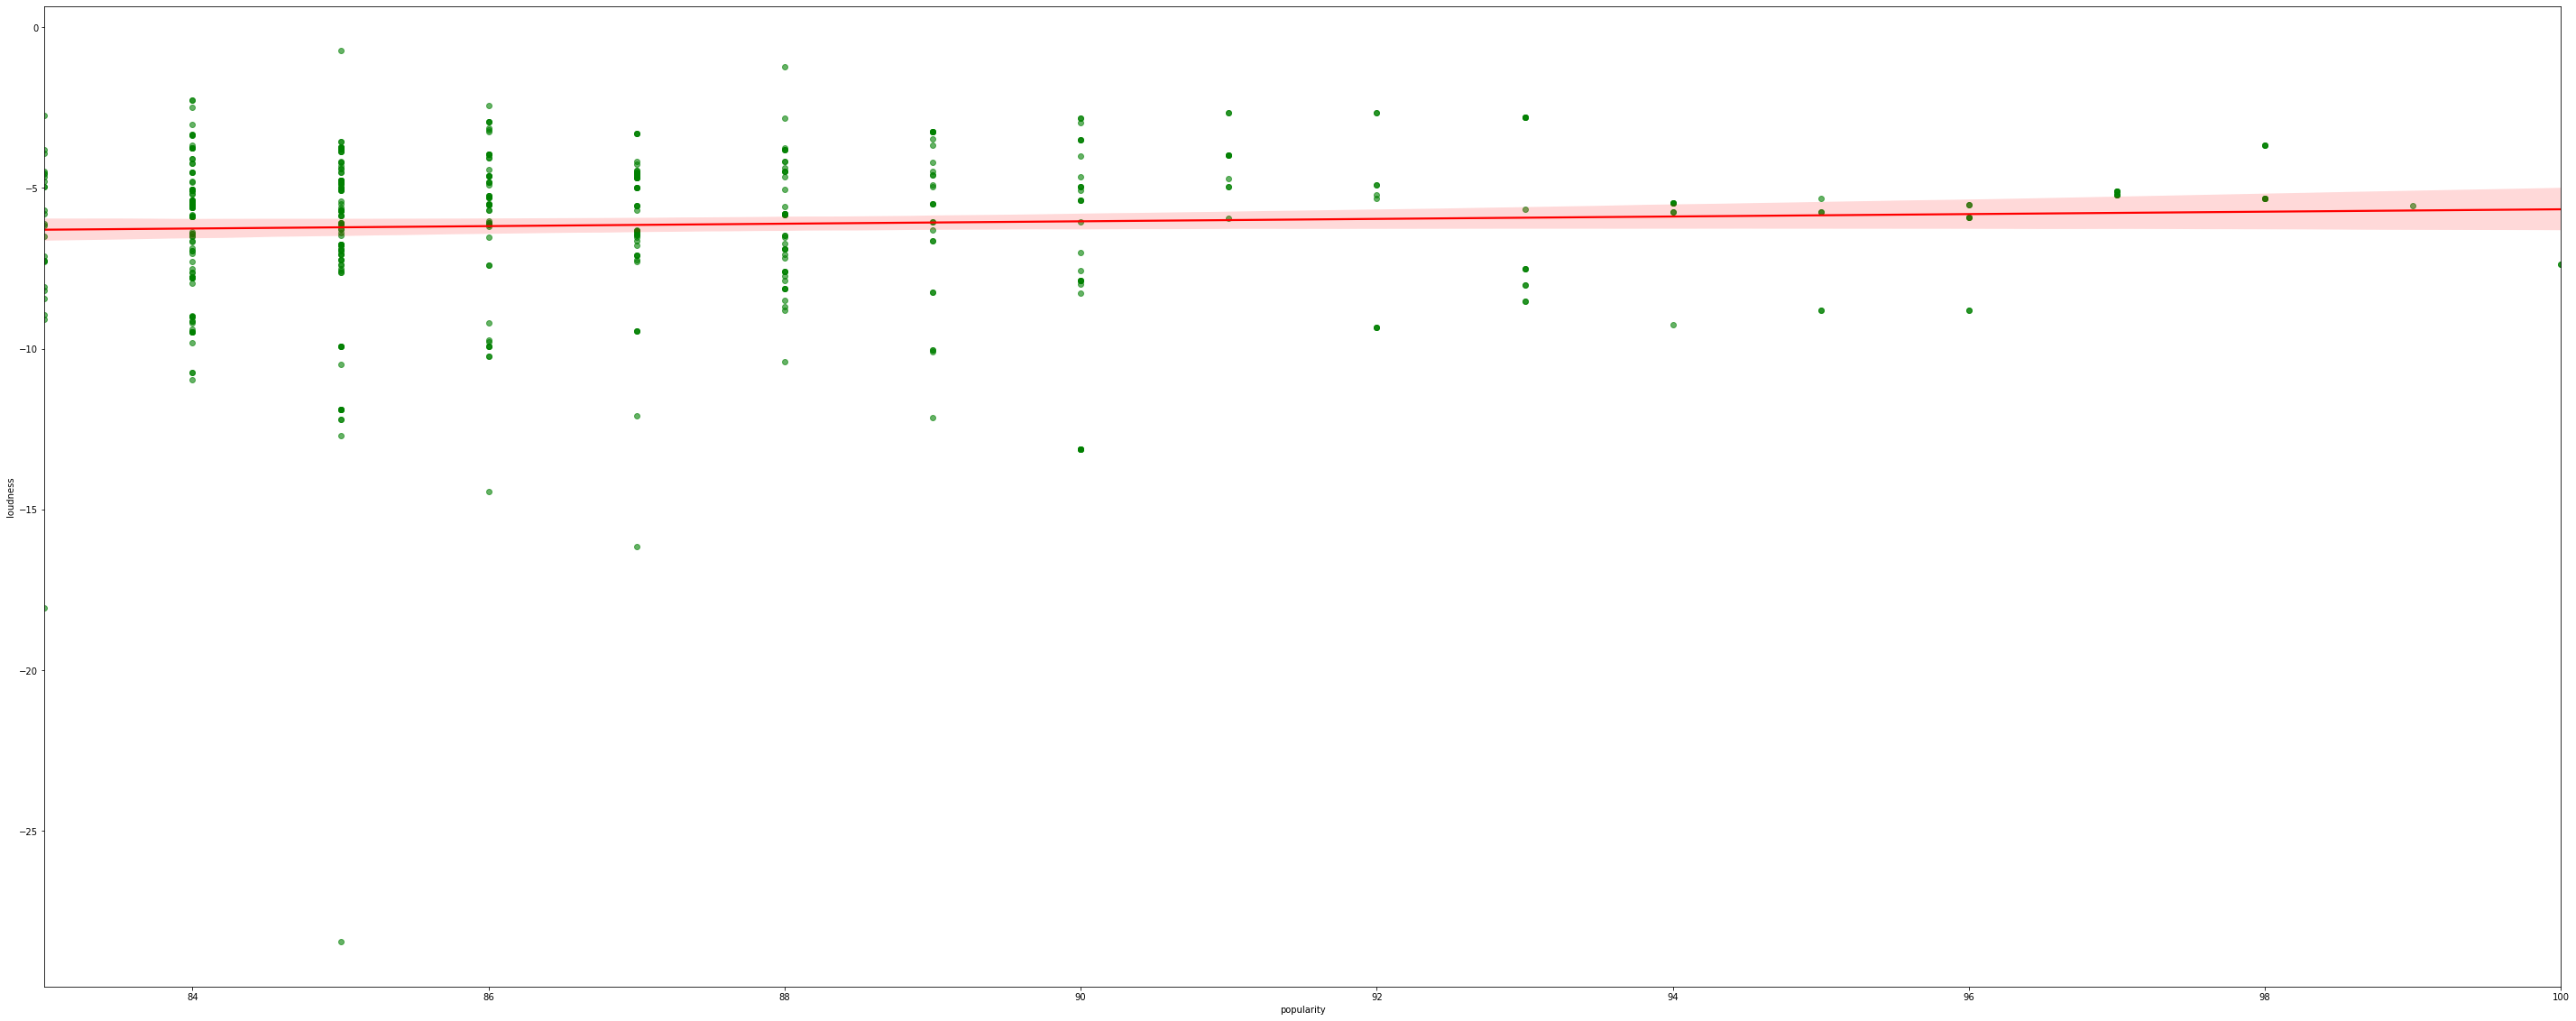

In [353]:
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular_500['popularity'], y=df_popular_500['loudness'],scatter_kws = {"color": "g","alpha":0.6},line_kws = {"color": "red"})
plt.show()

Let us pick top 100 popular songs to visualise this trendline more clearly.

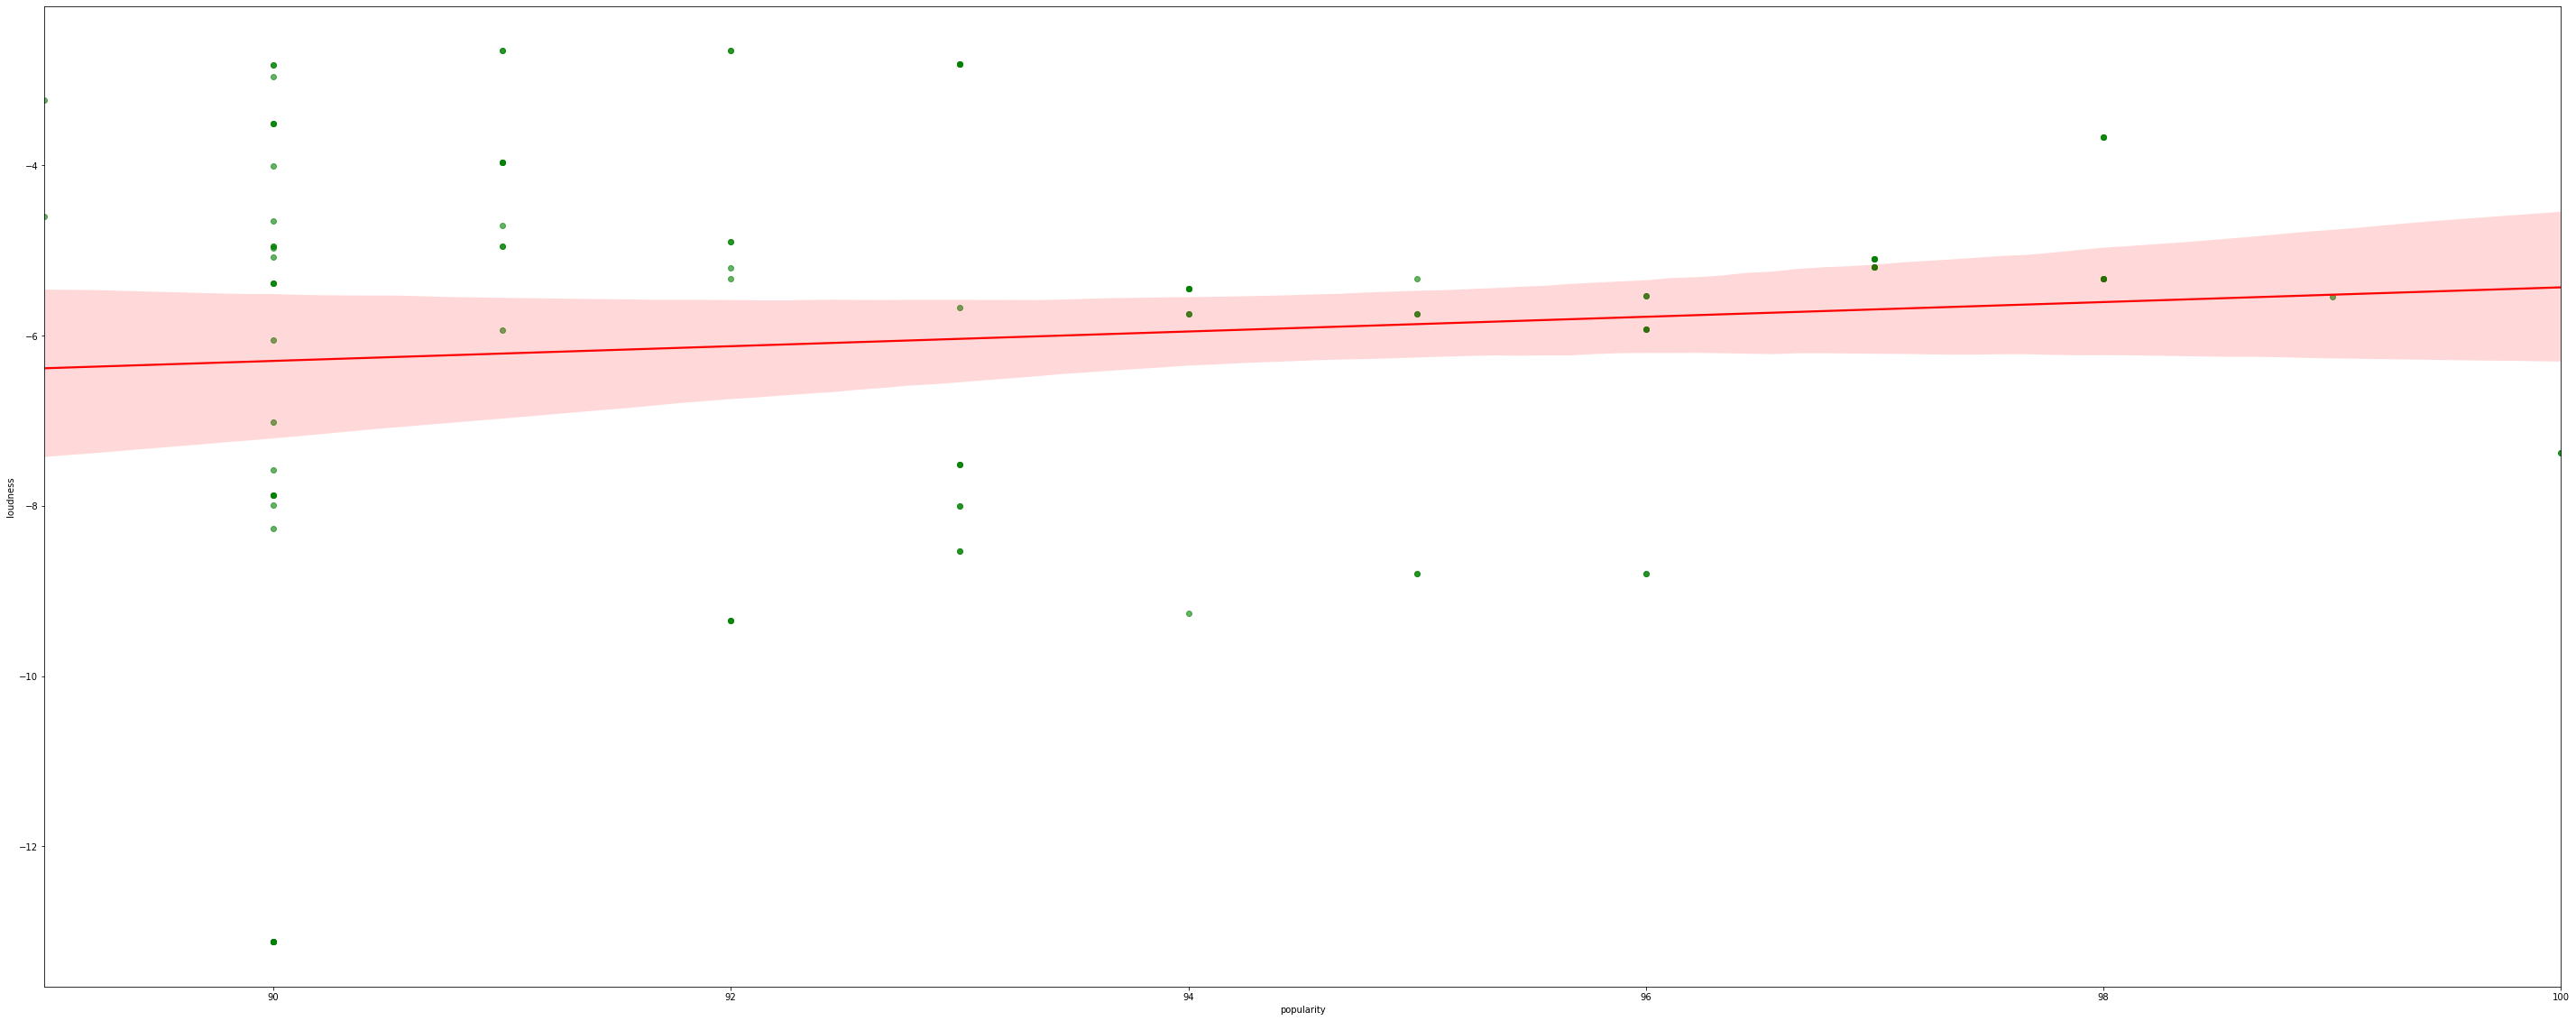

In [354]:
df_popular_100 = df_popular.iloc[:100]
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular_100['popularity'], y=df_popular_100['loudness'],scatter_kws = {"color": "g","alpha":0.6},line_kws = {"color": "red"})
plt.show()

Much like danceability, about loudness we can say that ***loud music is more popular***. 

There is one very interesting thing to note here that, when we used all our entries to visualise the data and then used 500 entries, our trendline was very slightly tilted. As we came down to picking up 100 entries, we observed that the trendline has a steeper slant. This tells us that the correlation coefficient for the entire dataset is close to 0 at the positive end. As we move upwards to most popular songs, we see that loudness and popularity start having a stronger correlation. This tells us that mong the most popular songs, the louder the music, the more popular the song is. It can possibly be said that the trendline points downwards at the left end because of the large amount of songs that have low loudness. 


#### Acousticness vs Popularity

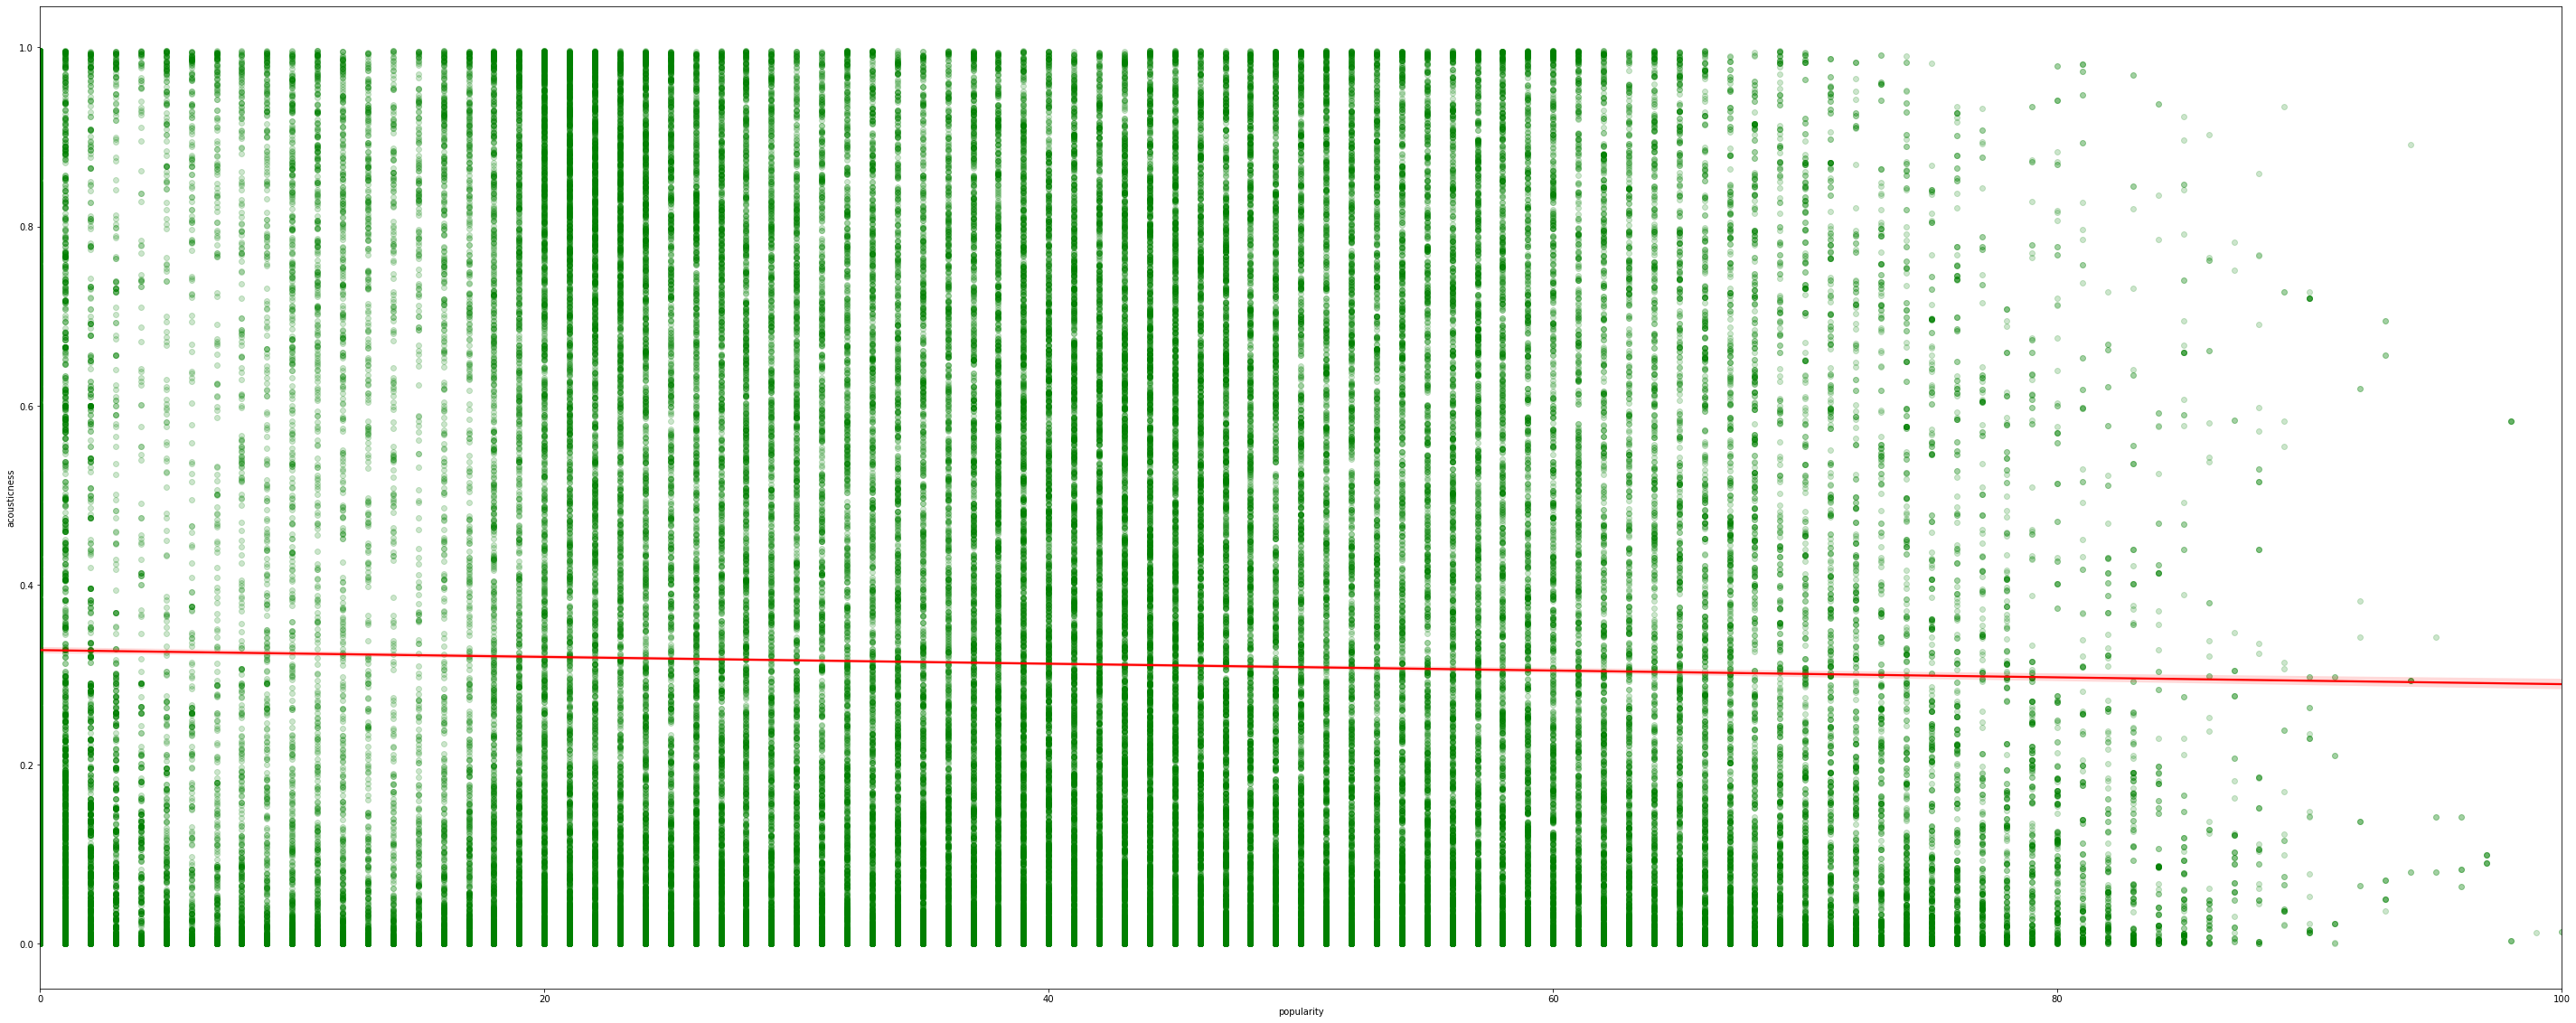

In [355]:
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular['popularity'], y=df_popular['acousticness'],scatter_kws = {"color": "g","alpha":0.2},line_kws = {"color": "red"})
plt.show()

As we can see, the regression line slants downwards. This shows that ***music with low acousticness is more popular***.

#### Speechiness vs Popularity

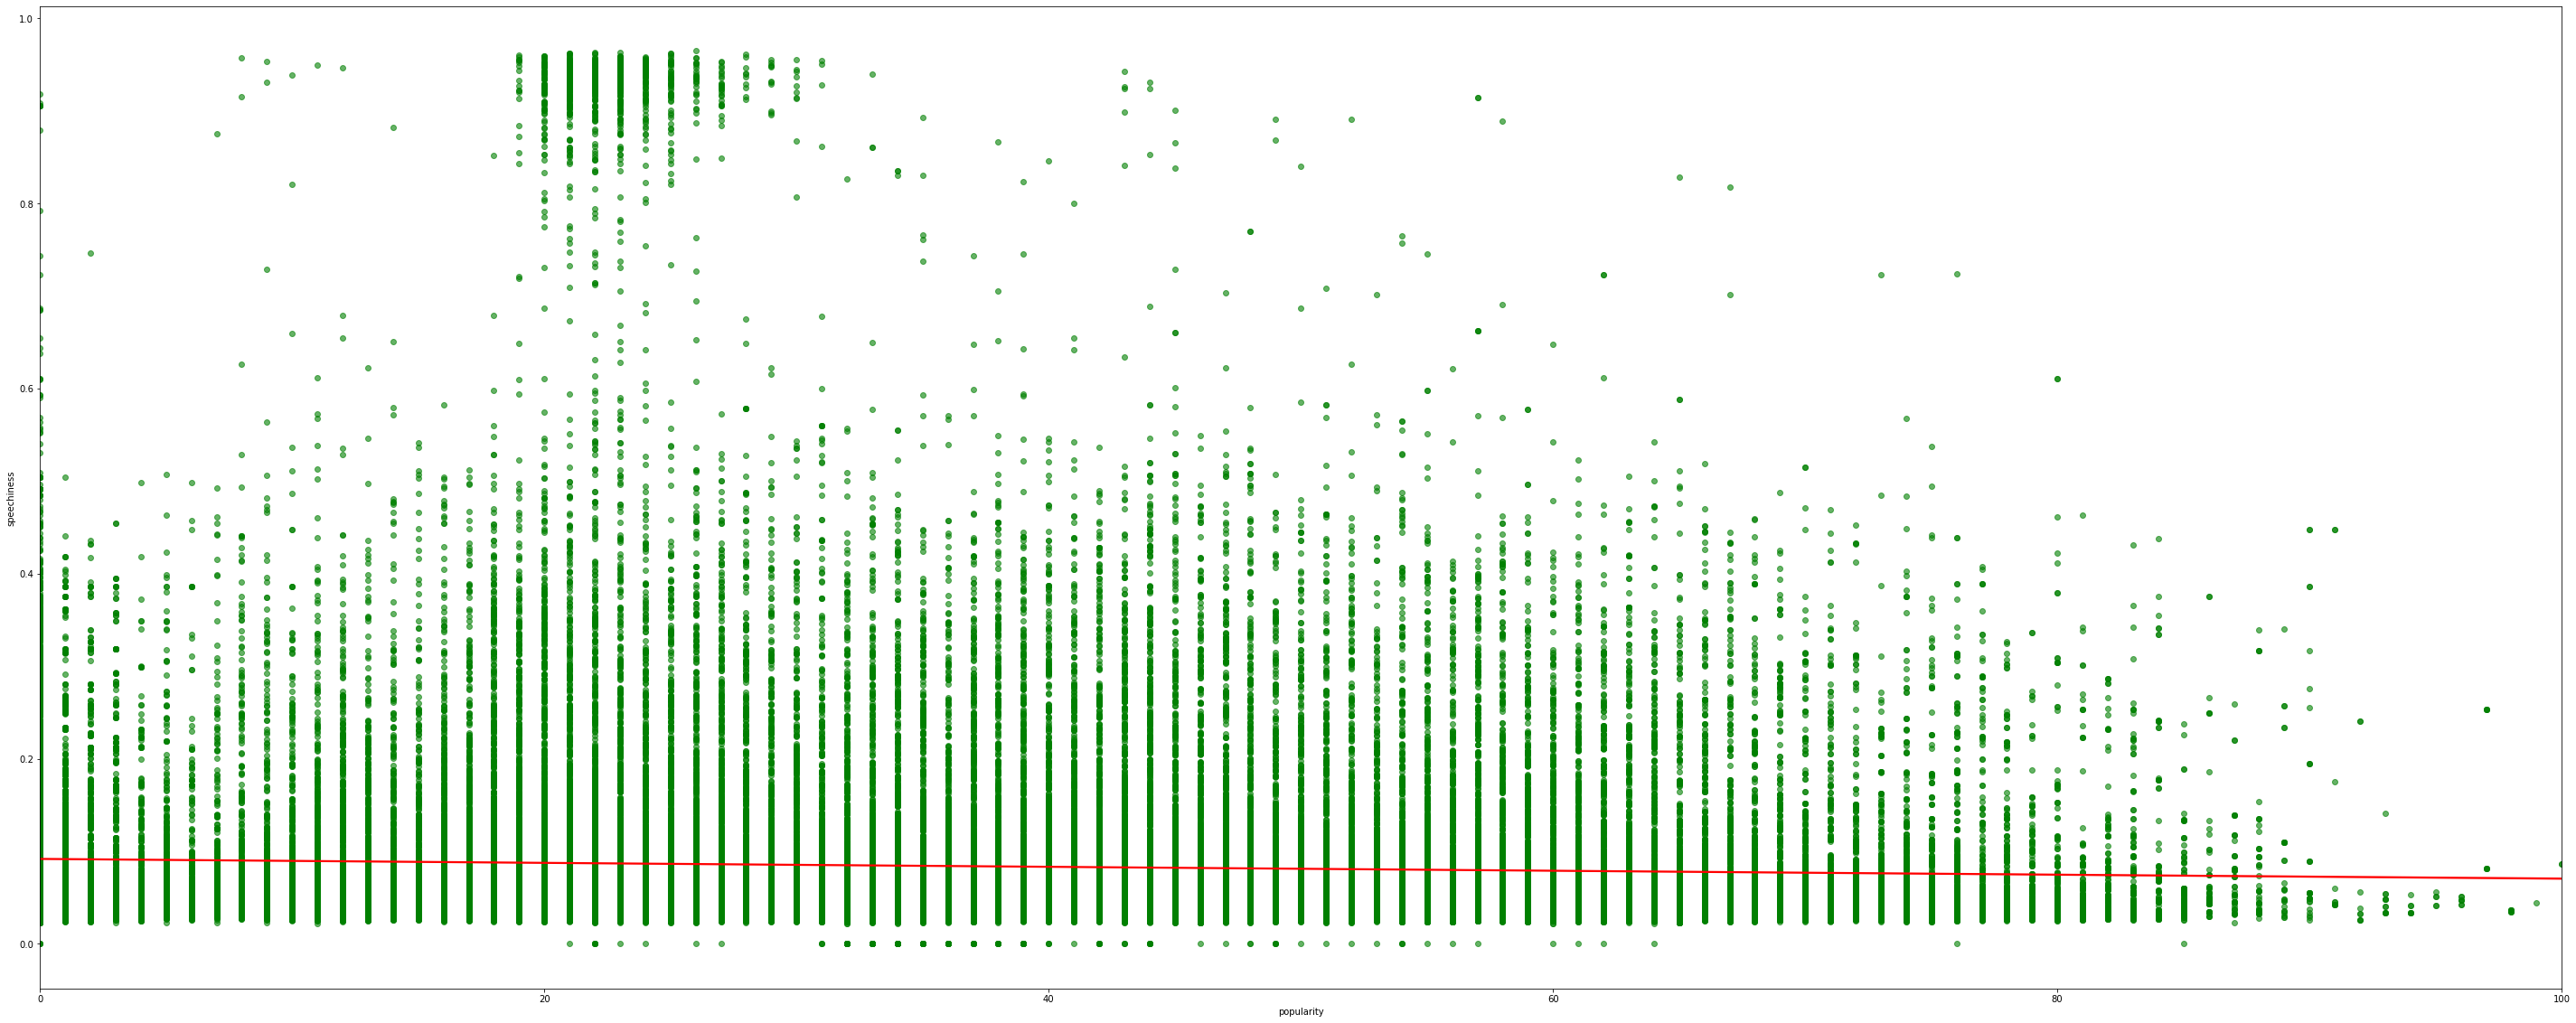

In [356]:
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular['popularity'], y=df_popular['speechiness'],scatter_kws = {"color": "g","alpha":0.6},line_kws = {"color": "red"})
plt.show()

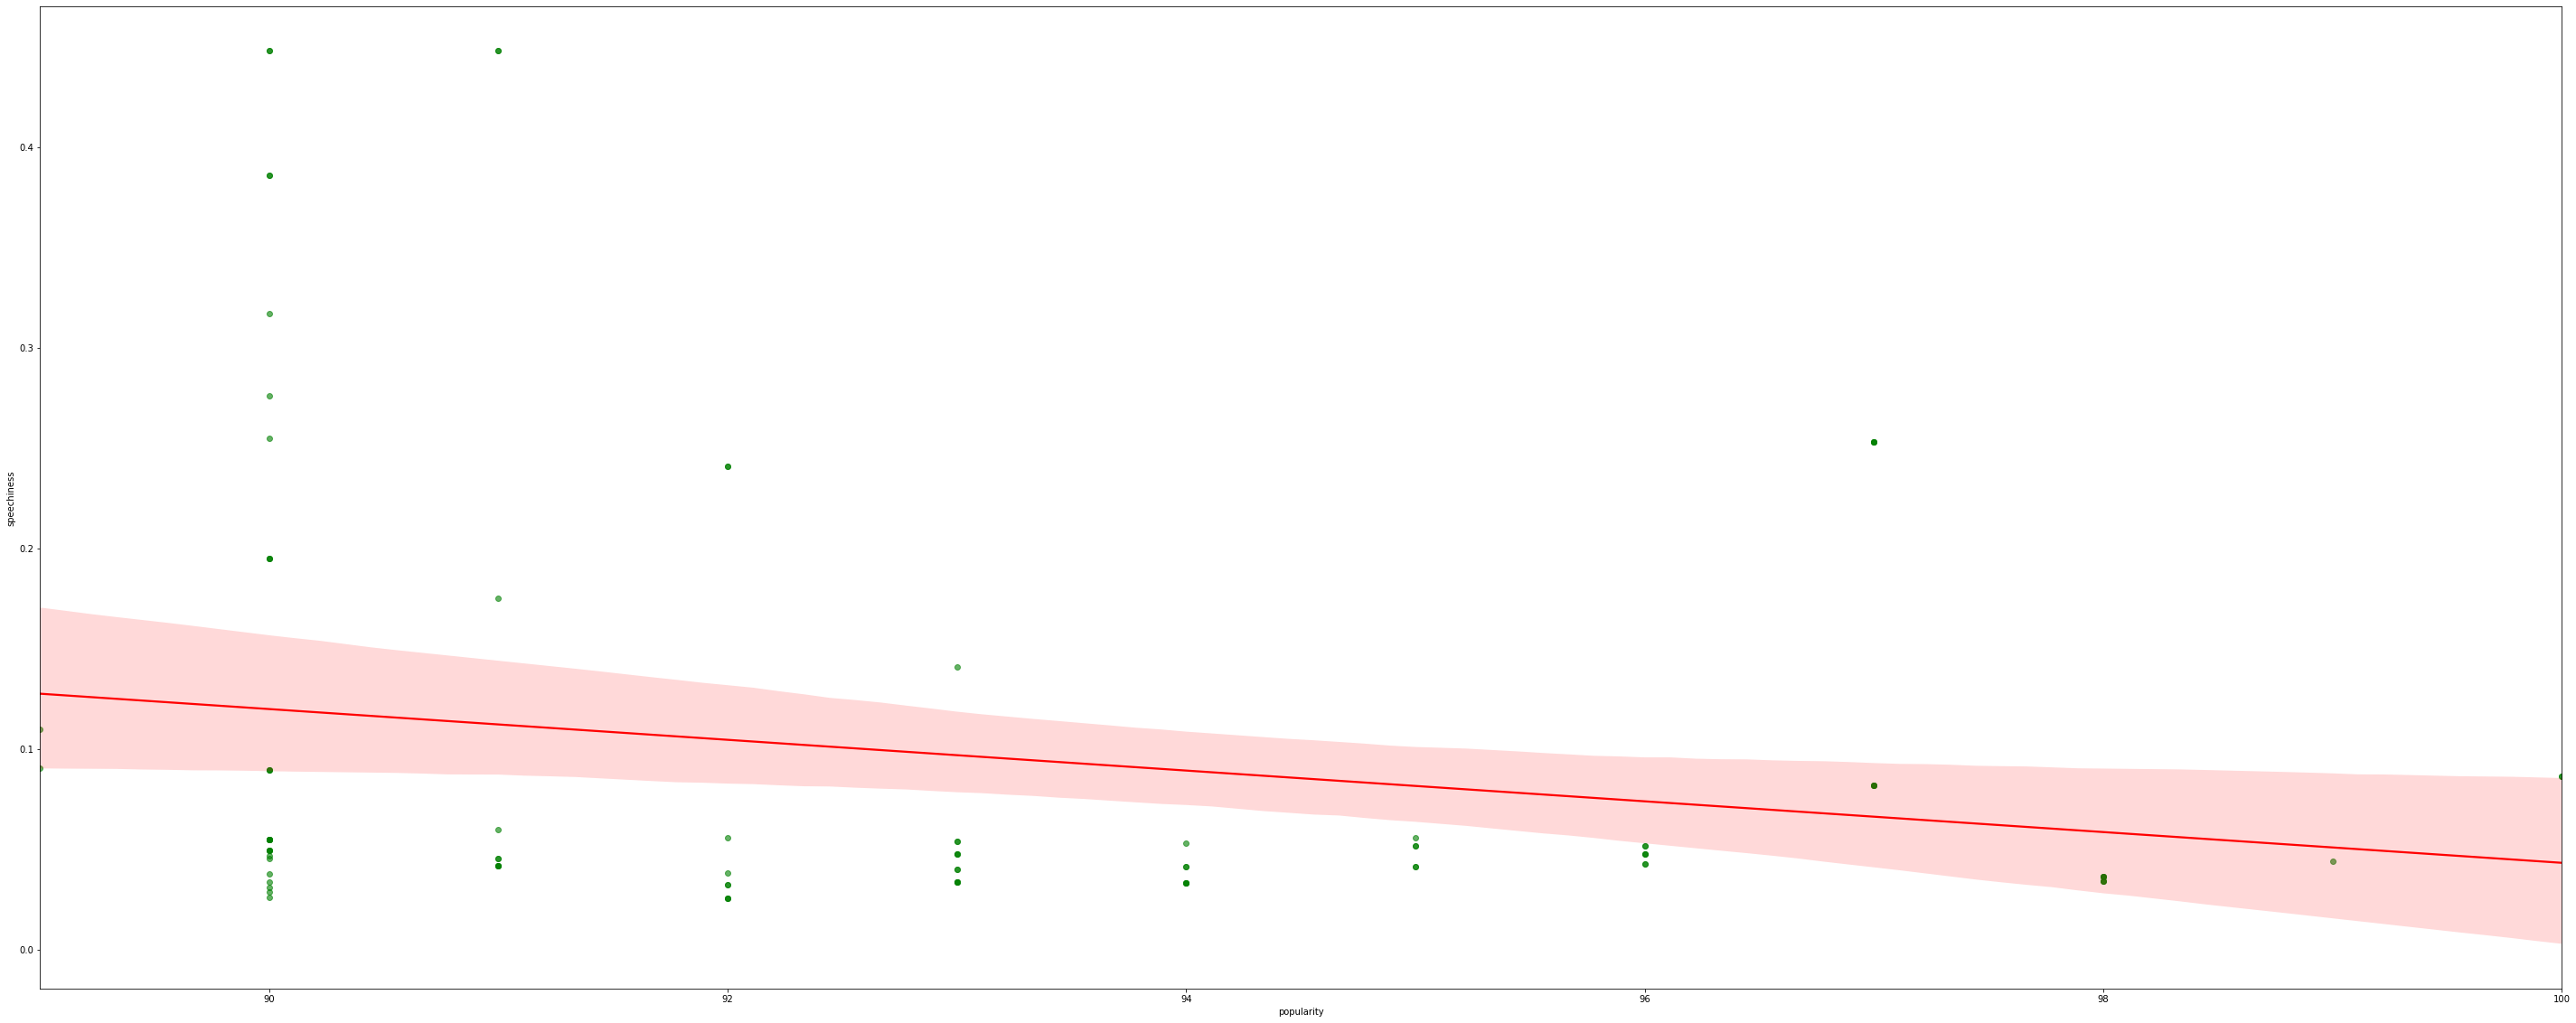

In [357]:
plt.figure(figsize = (50,20))
sb.regplot(x=df_popular_100['popularity'], y=df_popular_100['speechiness'],scatter_kws = {"color": "g","alpha":0.6},line_kws = {"color": "red"})
plt.show()

***Songs with higher speechiness are less popular*** However, it would not suffice to state that all songs with low speechiness are popular. 

## Cleaning and Preprocessing the data

We have now performed exploratory data analysis and derived certain inferences. However, we cannot yet derive any final conclusions as it might be possible that certain results could've been slightly skewed due to the presence of outliers. So, let us now check and remove the outliers, if any and then standardize the numerical columns.

We don't want our time_signature to get standardized. So, we'll remove the time_signature column and add it later after standardization of other numeric columns.
We shall first separate the numerical and categorical columns.

In [358]:
col=df_popular["time_signature"]
df_popular.drop(columns="time_signature",axis=1,inplace=True)
num_d = df_popular.select_dtypes(include=['int64','float64'])

cat_d = df_popular.select_dtypes(include=['object','bool'])

We create two separate dataframes - one for numerical columns and one for categorical columns.

In [359]:
df_popular_num=df[num_d.columns]
df_popular_cat=df[cat_d.columns]

We check for outliers in the numeric dataframe using the interquartile range. We substitute these outliers with NaN values.

In [360]:
#Removing outliers
for column in df_popular_num.columns:
    d = df_popular_num[column] 
    #First quartile    
    Q1 = d.quantile(0.25)
    #Third quartile
    Q3 = d.quantile(0.75)
    IQR = Q3 - Q1
    #Estimating lower bound
    minimum = Q1 - (1.5 * IQR)
    #Estimating upper bound
    maximum = Q3 + (1.5 * IQR)
    #The data points that lie above the upper bound or below the lower bound are called outliers. 
    outliers = ((d < minimum) |(d > maximum))
    #Replacing outliers with NaN which will be eventually dealt with in the next step.
    df_popular_num[column].loc[outliers]=np.nan
#Displaying number of outliers in each column which are now replaced with NaN values    
df_popular_num.isna().sum()

popularity              2
duration_ms          5617
danceability          620
energy                  0
key                     0
loudness             6173
mode                    0
speechiness         13211
acousticness            0
instrumentalness    25246
liveness             8642
valence                 0
tempo                 617
dtype: int64

Now, we shall fill these NaN values using KNN Imputer.

In [361]:
imputer=KNNImputer()
df_popular_num = pd.DataFrame(imputer.fit_transform(df_popular_num), columns=df_popular_num.columns)
df_popular_num.isna().sum()

popularity          0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

Our numeric dataframe is now outlier free. We check for null values in the categorical dataframe. In this case, the best option would be to drop the entries with NaN values in categorical columns. We shall do this after a few steps.

In [362]:
df_popular_cat.isna().sum()

track_id       0
artists        1
album_name     1
track_name     1
explicit       0
track_genre    0
dtype: int64

Now, we standardize the numeric dataframe.

In [363]:
sc = MinMaxScaler()
df_popular_num_std = pd.DataFrame(sc.fit_transform(df_popular_num),columns=df_popular_num.columns)


In [364]:
df_popular_num_std.head()

popularity  duration_ms  danceability  energy       key  loudness  mode  \
0    0.737374     0.536841      0.651792  0.4610  0.090909  0.556002   0.0   
1    0.555556     0.305086      0.363309  0.1660  0.090909  0.015109   1.0   
2    0.575758     0.480114      0.383593  0.3590  0.000000  0.401918   1.0   
3    0.717172     0.454688      0.189768  0.0596  0.000000  0.499226   1.0   
4    0.828283     0.445881      0.586432  0.4430  0.181818  0.404651   1.0   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  
0     0.910828      0.032329          0.000008  0.669159  0.718593  0.304429  
1     0.485987      0.927711          0.000046  0.188785  0.268342  0.240472  
2     0.354777      0.210843          0.000000  0.218692  0.120603  0.233376  
3     0.231210      0.908635          0.000580  0.246729  0.143719  0.879868  
4     0.335032      0.470884          0.000000  0.154953  0.167839  0.500889

Since, we have out scaled down numeric columns, we now concatenate back the numeric columns, time_signature and the categorical columns. We then drop the rows from the concatenated dataframed with NaN values in categorical columns.

In [365]:
df_concat=pd.concat([df_popular_num_std,df_popular_cat],axis=1)
df_concat=df_concat.join(col)

In [366]:
df_concat.isna().sum()

popularity          0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_id            0
artists             1
album_name          1
track_name          1
explicit            0
track_genre         0
time_signature      0
dtype: int64

In [367]:
df_concat=df_concat.dropna()
df_concat.shape

(113999, 20)

So far, so good. Let us proceed to our next step.

## Dimensionality Reduction using PCA

We have a dataset with about 13 numeric columns that we'll be using to fit an ML model. On fitting the entire dataset with 13 features to KMeans clustering algorithm, the Silhoutte Score came out to be fairly low, somewhere around 0.1.

One possible cause of this could be the number of  dimensions. Hence, we shall use Principal Component Analysis to deal with the Dimensionality curse.

Below plotted is a bar plot that explains how much variance is contributed by each feature among the 13 numeric features. As we know that while performing PCA, we must choose the number of components in such a way that max info is retained and variance is preserved. 


In [368]:
df_copy=df_concat.copy()
num_d2 = df_copy.select_dtypes(include=['int64','float64'])
df_popular_num_std2=df_copy[num_d2.columns]
df_popular_num_std2.drop(columns="time_signature",axis=1,inplace=True)
df_popular_num_std2.head()

popularity  duration_ms  danceability  energy       key  loudness  mode  \
0    0.737374     0.536841      0.651792  0.4610  0.090909  0.556002   0.0   
1    0.555556     0.305086      0.363309  0.1660  0.090909  0.015109   1.0   
2    0.575758     0.480114      0.383593  0.3590  0.000000  0.401918   1.0   
3    0.717172     0.454688      0.189768  0.0596  0.000000  0.499226   1.0   
4    0.828283     0.445881      0.586432  0.4430  0.181818  0.404651   1.0   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  
0     0.910828      0.032329          0.000008  0.669159  0.718593  0.304429  
1     0.485987      0.927711          0.000046  0.188785  0.268342  0.240472  
2     0.354777      0.210843          0.000000  0.218692  0.120603  0.233376  
3     0.231210      0.908635          0.000580  0.246729  0.143719  0.879868  
4     0.335032      0.470884          0.000000  0.154953  0.167839  0.500889

In [369]:
df_popular_num_std2.shape

(113999, 13)

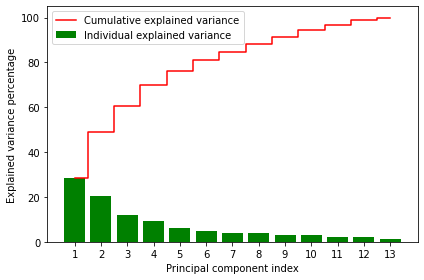

In [370]:
pca = PCA(n_components=None)
pca.fit(df_popular_num_std2)
expected_var = pca.explained_variance_ratio_ * 100
cummulative_expected_var = np.cumsum(expected_var)
plt.bar(range(1, 14), expected_var, align='center',label='Individual explained variance',color='green')
plt.step(range(1, 14), cummulative_expected_var, where='mid',label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.legend(loc='best')
plt.tight_layout()

From the above plot we see that, first 3 features account to maximum amount of variance. Hence we shall use only the first three features

In [371]:
pca = PCA(n_components = 3)
pca.fit(df_popular_num_std2)
df_popular_num_pca = pca.transform(df_popular_num_std2)

In [372]:
df_popular_num_pca.shape

(113999, 3)

## Fitting the data to an ML model

As we know that we are basically trying to fit our data to K Means clustering algorithm. For  this we require our standardized numeric column dataframe - df_popular_num_std. 

Now to find the optimal number of clusters, we shall use the elbow method.

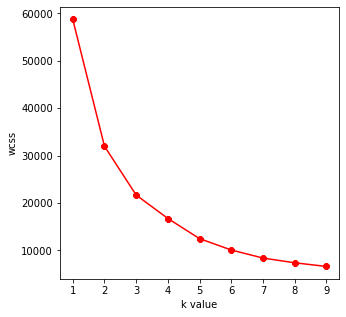

In [373]:
wcss=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=0,init="k-means++")
    kmeans.fit(df_popular_num_pca)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(5,5))
plt.grid
plt.plot(range(1,10),wcss,color="red",marker="8")
plt.xlabel("k value")
plt.ylabel("wcss")
plt.show()

Let us now  print the wcss scores.

In [374]:
wcss

[58747.89905193486,
 31970.01104973045,
 21665.72471768551,
 16713.62544417569,
 12461.8001128323,
 10064.583885548287,
 8363.857052286265,
 7364.104550690986,
 6593.698938466335]

Looking at the above plot and wcss values, we see that the optimal numer of clusters is 5. let us fit the data to 5 clusters and calculate the labels.

In [375]:
kmeans=KMeans(n_clusters=5,random_state=0)
label=kmeans.fit_predict(df_popular_num_pca)
print(label)

[0 1 2 ... 3 4 3]


Let us print the centroids of the clusters.

In [376]:
print(kmeans.cluster_centers_)

[[ 0.68984301 -0.05149067 -0.0330158 ]
 [-0.52951512  0.46812583  0.04632116]
 [-0.33390767 -0.30775001 -0.29963676]
 [ 0.44229871  0.69595678 -0.06553217]
 [-0.23888077 -0.31365587  0.28407318]]


In [377]:
print(f'Silhouette Score = {silhouette_score(df_popular_num_pca, label)}')

Silhouette Score = 0.45130768507946056


The above Silhoutte Score indicates that our clusters are pretty decent.

Since we have our clustered data ready, let us relate this back to our original dataframe.
For this, we shall first convert the labels into a dataframe.

In [378]:
clusters = pd.DataFrame(label, dtype=int)
clusters.columns = ['k_cluster']
print(clusters.shape)
clusters.head()

(113999, 1)


k_cluster
0          0
1          1
2          2
3          1
4          1

Now we will concatenate this clusters dataframe with our origina dataframe.

In [379]:
df_cluster = pd.concat([df_concat.reset_index(drop=True), clusters.reset_index(drop=True)], axis=1)
print(df_concat.shape,df_cluster.shape)
df_cluster.head()

(113999, 20) (113999, 21)


popularity  duration_ms  danceability  energy       key  loudness  mode  \
0    0.737374     0.536841      0.651792  0.4610  0.090909  0.556002   0.0   
1    0.555556     0.305086      0.363309  0.1660  0.090909  0.015109   1.0   
2    0.575758     0.480114      0.383593  0.3590  0.000000  0.401918   1.0   
3    0.717172     0.454688      0.189768  0.0596  0.000000  0.499226   1.0   
4    0.828283     0.445881      0.586432  0.4430  0.181818  0.404651   1.0   

   speechiness  acousticness  instrumentalness  ...   valence     tempo  \
0     0.910828      0.032329          0.000008  ...  0.718593  0.304429   
1     0.485987      0.927711          0.000046  ...  0.268342  0.240472   
2     0.354777      0.210843          0.000000  ...  0.120603  0.233376   
3     0.231210      0.908635          0.000580  ...  0.143719  0.879868   
4     0.335032      0.470884          0.000000  ...  0.167839  0.500889   

                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name explicit  track_genre time_signature  k_cluster  
0                      Comedy    False     acoustic              4          0  
1            Ghost - Acoustic    False     acoustic              4          1  
2              To Begin Again    False     acoustic              4          2  
3  Can't Help Falling In Love    False     acoustic              3          1  
4                     Hold On    False     acoustic              4          1  

[5 rows x 21 columns]

## Analysing our Clustered Dataframe

We finally have our dataframe assigned into clusters. Let us analyse this clustered dataframe.

Let us first see how many entries does each cluster comprise of.

In [380]:
df_cluster['k_cluster'].value_counts()

0    30484
4    27595
2    23727
1    21359
3    10834
Name: k_cluster, dtype: int64

In [420]:
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
0    0.343601
2    0.342898
4    0.332719
3    0.329540
1    0.323596
Name: popularity, dtype: float64

Let us check if there are any NaN values in our final dataframe.

In [381]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  float64
 1   duration_ms       113999 non-null  float64
 2   danceability      113999 non-null  float64
 3   energy            113999 non-null  float64
 4   key               113999 non-null  float64
 5   loudness          113999 non-null  float64
 6   mode              113999 non-null  float64
 7   speechiness       113999 non-null  float64
 8   acousticness      113999 non-null  float64
 9   instrumentalness  113999 non-null  float64
 10  liveness          113999 non-null  float64
 11  valence           113999 non-null  float64
 12  tempo             113999 non-null  float64
 13  track_id          113999 non-null  object 
 14  artists           113999 non-null  object 
 15  album_name        113999 non-null  object 
 16  track_name        11

We are good to go!!

Let us now check 10 entries of any random cluster, say 0.

In [414]:
df_cluster.loc[df_cluster['k_cluster'] == 0][:10]

popularity  duration_ms  danceability  energy       key  loudness  mode  \
0      0.737374     0.536841      0.651792   0.461  0.090909  0.556002   0.0   
24     0.000000     0.538556      0.787018   0.667  0.454545  0.654755   0.0   
27     0.000000     0.659748      0.603336   0.429  0.363636  0.554043   0.0   
52     0.606061     0.566728      0.446698   0.652  0.545455  0.601537   0.0   
61     0.626263     0.575880      0.374577   0.791  0.545455  0.624433   0.0   
79     0.656566     0.523803      0.614604   0.638  0.090909  0.648773   0.0   
80     0.000000     0.549727      0.398242   0.700  0.909091  0.563686   0.0   
86     0.707071     0.507983      0.510931   0.836  0.909091  0.705961   0.0   
98     0.000000     0.385152      0.634888   0.937  0.363636  0.637943   0.0   
114    0.535354     0.484575      0.361055   0.790  0.363636  0.563583   0.0   

     speechiness  acousticness  instrumentalness  ...   valence     tempo  \
0       0.910828      0.032329          0.000008  ...  0.718593  0.304429   
24      0.249682      0.382530          0.000000  ...  0.757789  0.366197   
27      0.242675      0.044578          0.000000  ...  0.522613  0.647130   
52      0.200000      0.075703          0.020984  ...  0.299497  0.605578   
61      0.192357      0.072892          0.158197  ...  0.218090  0.819296   
79      0.259236      0.204819          0.000000  ...  0.603015  0.268145   
80      0.274522      0.456827          0.019098  ...  0.371859  0.685537   
86      0.333758      0.005040          0.000172  ...  0.761809  0.900249   
98      0.623567      0.323293          0.000009  ...  0.809045  0.412571   
114     0.322293      0.028514          0.000082  ...  0.197990  0.844510   

                   track_id                 artists  \
0    5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
24   3Hn3LfhrQOaKihdCibJsTs              Jason Mraz   
27   0dzKBptH2P5j5a0MifBMwM              Jason Mraz   
52   2DHDuADAHoUW6n0z80RLQF            Andrew Belle   
61   6nXIYClvJAfi6ujLiKqEq8            Andrew Belle   
79   7BXW1QCg56yzEBV8pW8pah              Jason Mraz   
80   2kMrCPZ0o5gErBPLCRgoli         Gabrielle Aplin   
86   6Uy6K3KdmUdAfelUp0SeXn          Sara Bareilles   
98   7DYsBLdOqz0z14tYWMt2Tn             KT Tunstall   
114  6gijbGNDNNJgT60Aj7UCyc  Matthew Perryman Jones   

                             album_name             track_name explicit  \
0                                Comedy                 Comedy    False   
24         Human - Best Adult Pop Tunes               Unlonely    False   
27   Feeling Good - Adult Pop Favorites         If It Kills Me    False   
52                           Black Bear                 Pieces    False   
61                      The Daylight EP       Sky's Still Blue    False   
79                                Know.            Have It All    False   
80                     Mellow Adult Pop            Heavy Heart    False   
86                   The Blessed Unrest                  Brave    False   
98                    Del gusto de mamá                Hold On    False   
114               Living in the Shadows  Living in the Shadows    False   

     track_genre time_signature  k_cluster  
0       acoustic              4          0  
24      acoustic              4          0  
27      acoustic              4          0  
52      acoustic              4          0  
61      acoustic              4          0  
79      acoustic              4          0  
80      acoustic              4          0  
86      acoustic              4          0  
98      acoustic              4          0  
114     acoustic              4          0  

[10 rows x 21 columns]

In [415]:
#Creating a copy of our dataset
df_cluster_2=df_cluster.copy()

Whenever a user listens to any track from our existing dataset, our recommendation engine can recommend relevant songs based on the clusters. For example, a user listens to 'Pieces' by Andrew Belle. This track belongs to cluster 0. Hence, we can recommend the user all songs belonging to Cluster 0. We hope the user ends up liking it!

Let us create a function that performs the above task.

In [422]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, artists,amount=1):
        new_df = self.dataset[self.dataset.track_name.str.lower() == songs.lower()]
        new_df = new_df[new_df.artists.str.lower() == artists.lower()]
        k=new_df['k_cluster'].values[0]
        new_df_2=self.dataset.loc[self.dataset['k_cluster'] == k]      
        columns = ['artists', 'track_name']
        return new_df_2[columns][:amount]

In [423]:
recommendations = Spotify_Recommendation(df_cluster_2)
recommendations.recommend("Pieces","Andrew Belle",10)

artists             track_name
0               Gen Hoshino                 Comedy
24               Jason Mraz               Unlonely
27               Jason Mraz         If It Kills Me
52             Andrew Belle                 Pieces
61             Andrew Belle       Sky's Still Blue
79               Jason Mraz            Have It All
80          Gabrielle Aplin            Heavy Heart
86           Sara Bareilles                  Brave
98              KT Tunstall                Hold On
114  Matthew Perryman Jones  Living in the Shadows

We have 10 songs that users listening to 'Pieces' by Andrew Belle will hopefully like!

## Conclusion

As we see, Cluster 0 has the most popular songs and Cluster 1 has the least popular songs, looking at the mean popularity score of each cluster.

We have thus built a simple recommendation system that uses the track name and artist name among the existing dataset and renders an output of recommended songs to the user. Moreover, we can also save our clustered dataframe and then fit a multiclass Machine Learning algorithm that takes new input for all the features used and classifies it into one of the clusters and then uses the same recommendation function that we have built above.

**Author: Amisha Sahoo**